# Project 2 : Ames Housing Data and Kaggle Challenge
---

## Background

A real estate company that you are working for recently got a new client who expresses interest in purchasing a property in a quiet area. You are part of a team that is to provide recommendations on the property that he should purchase that would fulfill his requirement and also earn him a return in the future. 

## Problem Statement

Properties in low density areas tend to have low selling prices. Create a model to identify the features and characteristics of a property that would help to increase the value. 

## Executive Summary

This project looks at kaggle data set for property prices that were sold in 2006-2010. The data is broken down to property-level and includes information of features that each property has. 

Using exploratory data analysis and data visualisations, this project aims to look at the different relationships that are driving the property price. Through this, the features that are important will be identified.

### Contents:
- [1. Import Libraries](#1.-Import-Libraries)
- [2. Data Import](#2.-Data-Import)
- [3. Data Cleaning](#3.-Data-Cleaning)
    - [3.1. Data](#3.1.-Data)
    - [3.2. Missing Values](#3.2.-Missing-Values)
    - [3.3. Errors](#3.3.-Errors)
    - [3.4. Outliers](#3.4.-Outliers)
- [4. Exploratory Data Analysis: Numerical Features](#4.-Exploratory-Data-Analysis:-Numerical-Features)
    - [4.1. All Features](#4.1.-All-Features)
    - [4.2. Sale Price](#4.2.-Sale-Price)
    - [4.3. Combining Numerical Features](#4.3.-Combining-Numerical-Features)
- [5. Exploratory Data Analysis: Categorical Features](#5.-Exploratory-Data-Analysis:-Categorical-Features)
    - [5.1. Categorical Features](#5.1.-Categorical-Features)
    - [5.2. Transforming Categorical Features](#5.2.-Transforming-Categorical-Features)
- [6. Exploratory Visualization](#6.-Exploratory-Visualization)
    - [6.1. Heatmap](#6.1.-Heatmap)
    - [6.2. Interactive Features](#6.2.-Interactive-Features)
    - [6.3. Scatterplot](#6.3.-Scatterplot)
- [7. Modeling](#7.-Modeling)
    - [7.1. Baseling Score](#7.1.-Baseline-Score)
    - [7.2. Pre-Processing](#7.2.-Pre--Processing)
    - [7.3. Regression Models](#7.3.-Regression-Models)
- [8. Evaluation](#8.-Evaluation)
    - [8.1. Results Summary](#8.1.-Results-Summary)
    - [8.2. Production Model](#8.2.-Production-Model) 
- [9. Conclusions/Recommendations](#9.-Conclusions/Recommendations)
- [10. Kaggle Submission](#10.-Kaggle-Submission)

## 1. Import Libraries
---

In [4369]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

## 2. Data Import
---

In [4370]:
# Import data
path = "../datasets/train.csv"
full_train = pd.read_csv(path)

In [4371]:
# Display data
pd.set_option("display.max_columns", None)
full_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4372]:
train, holdout = train_test_split(full_train, train_size=0.8, random_state=42)

## 3. Data Cleaning
---

## 3.1. Data

In [4373]:
# read dictionary
with open('../datasets/data_description.txt') as f:
    reader = csv.reader(f, delimiter="\t")
    data = list(reader)

data

[['MSSubClass: Identifies the type of dwelling involved in the sale.', ''],
 [],
 ['        20', '1-STORY 1946 & NEWER ALL STYLES'],
 ['        30', '1-STORY 1945 & OLDER'],
 ['        40', '1-STORY W/FINISHED ATTIC ALL AGES'],
 ['        45', '1-1/2 STORY - UNFINISHED ALL AGES'],
 ['        50', '1-1/2 STORY FINISHED ALL AGES'],
 ['        60', '2-STORY 1946 & NEWER'],
 ['        70', '2-STORY 1945 & OLDER'],
 ['        75', '2-1/2 STORY ALL AGES'],
 ['        80', 'SPLIT OR MULTI-LEVEL'],
 ['        85', 'SPLIT FOYER'],
 ['        90', 'DUPLEX - ALL STYLES AND AGES'],
 ['       120', '1-STORY PUD (Planned Unit Development) - 1946 & NEWER'],
 ['       150', '1-1/2 STORY PUD - ALL AGES'],
 ['       160', '2-STORY PUD - 1946 & NEWER'],
 ['       180', 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER'],
 ['       190', '2 FAMILY CONVERSION - ALL STYLES AND AGES'],
 [],
 ['MSZoning: Identifies the general zoning classification of the sale.'],
 ['', '', ''],
 ['       A', 'Agriculture'],
 ['      

In [4374]:
# check the data types
full_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

The dataset has 2,051 values. Overall Cond, Overall Qual and MS SubClass should be categorical variables.

In [4375]:
full_train["MS Zoning"].value_counts()

RL         1598
RM          316
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64

There are non-residential property data in the dataset. Will exclude C(all), A(all) and I(all) data from the analysis. This will remove 22 observations from the dataset. 

In [4376]:
full_train = full_train[full_train["MS Zoning"].isin(["RL", "RM", "RH", "FV"])].reset_index(drop=True)
holdout = holdout[holdout["MS Zoning"].isin(["RL", "RM", "RH", "FV"])].reset_index(drop=True)
train = train[train["MS Zoning"].isin(["RL", "RM", "RH", "FV"])].reset_index(drop=True)

## 3.2. Missing Values

In [4377]:
# create a function to print value counts for the remaining columns with at least 1 null value
def column_with_nulls(dataframe):
    column_names = []
    for i, col in enumerate(dataframe):
        if dataframe[col].isnull().sum() > 0:
            column_names.append(col)
            print(dataframe[col].value_counts())
            print(f"Number of Null Values: {dataframe[col].isnull().sum()}")
            print("\n")
    
    print(f"Number of features with null values: \n{len(column_names)}")
    print(f"\nFeatures with null values: \n{column_names}")

In [4378]:
column_with_nulls(full_train)

60.0     172
70.0      96
80.0      93
50.0      87
65.0      70
        ... 
121.0      1
25.0       1
115.0      1
119.0      1
22.0       1
Name: Lot Frontage, Length: 118, dtype: int64
Number of Null Values: 330


Grvl    84
Pave    53
Name: Alley, dtype: int64
Number of Null Values: 1892


None       1196
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64
Number of Null Values: 22


0.0       1194
120.0       11
200.0       10
176.0       10
72.0         9
          ... 
224.0        1
738.0        1
1095.0       1
479.0        1
436.0        1
Name: Mas Vnr Area, Length: 373, dtype: int64
Number of Null Values: 22


TA    872
Gd    864
Ex    184
Fa     58
Name: Bsmt Qual, dtype: int64
Number of Null Values: 51


TA    1820
Gd      89
Fa      61
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64
Number of Null Values: 51


No    1325
Av     286
Gd     203
Mn     161
Name: Bsmt Exposure, dtype: int64
Number of Null Values: 54


GLQ    614
Unf    590
A

There are 26 features that contain null values. The null values are due to the absence of that particular feature in the house. Will look at each of these features in greater detail in the following subsections.

In [4379]:
# Check the features that have high null values in the dataset
full_train.isnull().sum().sort_values(ascending=False)[:10]

Pool QC          2020
Misc Feature     1965
Alley            1892
Fence            1632
Fireplace Qu      978
Lot Frontage      330
Garage Finish     106
Garage Qual       106
Garage Yr Blt     106
Garage Cond       106
dtype: int64

Variables such as Pool QC, Misc Feature, Alley, Fence, and Fireplace Qu have high null values. Will drop these columns from the dataset.

### Garage-Related Features

In [4380]:
# garage type feature with null values
garage_null = ["Garage Type", 
               "Garage Yr Blt", 
               "Garage Finish", 
               "Garage Cars", 
               "Garage Area", 
               "Garage Cond", 
               "Garage Qual"]

full_train.loc[full_train["Garage Type"].isnull(), garage_null].\
sort_values("Garage Area", ascending=False).head()

,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Cond,Garage Qual
52,NaN,NaN,NaN,0.0,0.0,NaN,NaN
957,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1448,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1435,NaN,NaN,NaN,0.0,0.0,NaN,NaN
1423,NaN,NaN,NaN,0.0,0.0,NaN,NaN


Houses with null values seen in the "Garage Type" feature also have null values in other garage-related features like "Garage Finish". These houses do not have a garage. For categorical features, will replace na with "None". For numerical features, will replace na with 0.

### Basement-Related Features

In [4381]:
bsmt_null = ["Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", 
             "BsmtFin SF 1", "BsmtFin Type 2", "BsmtFin SF 2", "Bsmt Unf SF", 
             "Total Bsmt SF", "Bsmt Full Bath", "Bsmt Half Bath"]

full_train.loc[full_train["Bsmt Qual"].isnull(), bsmt_null].\
sort_values("Total Bsmt SF", ascending=False).head()

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
12,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1361,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1076,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1085,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0
1112,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0


Houses with null values seen in the "Bsmt Qual" feature also have null values in other basement-related features like "Bsmt Cond". These houses do not have a basement. For categorical features, will replace na with "None". For numerical features, will replace na with 0.

### Lot Frontage

In [4382]:
full_train.loc[full_train["Lot Frontage"].isnull(), ["Lot Frontage", "Street", "SalePrice"]].\
sort_values("SalePrice", ascending=False).head()

,Lot Frontage,Street,SalePrice
1104,NaN,Pave,466500
325,NaN,Pave,430000
1957,NaN,Pave,340000
456,NaN,Pave,330000
822,NaN,Pave,315000


Will replace the feature with the mean value using the train dataset.

### Masonry Veneer Related Features

In [4383]:
vnr_null = ["Mas Vnr Type", "Mas Vnr Area"]
full_train.loc[full_train["Mas Vnr Type"].isnull(), vnr_null].\
sort_values("Mas Vnr Area", ascending=False)[:10]

,Mas Vnr Type,Mas Vnr Area
22,NaN,NaN
40,NaN,NaN
85,NaN,NaN
209,NaN,NaN
273,NaN,NaN
335,NaN,NaN
424,NaN,NaN
444,NaN,NaN
583,NaN,NaN
831,NaN,NaN


Houses with null values seen in the "Mas Vnr Type" feature also have null values in other masonry veneer-related features like "Mas Vnr Area". These houses have no masonry veneer. For categorical features, will replace na with "None". For numerical features, will replace na with 0.

In [4384]:
# create a function to replace the na values
def clean_data(dataframe):
    column_drop = ["Pool QC", "Misc Feature", "Alley", "Fence", "Fireplace Qu"]
    column_none = ["Garage Type", "Garage Finish", "Garage Qual", "Garage Cond", 
                   "Bsmt Qual", "Bsmt Cond", "Bsmt Exposure", "BsmtFin Type 1", 
                   "BsmtFin Type 2", "Mas Vnr Type"]
    column_0 = ["Garage Cars", "Garage Area", "Garage Yr Blt", "BsmtFin SF 1",
                "BsmtFin SF 2", "Bsmt Unf SF", "Total Bsmt SF", "Bsmt Full Bath", 
                "Bsmt Half Bath", "Mas Vnr Area"]
    column_type = ["Overall Cond", "Overall Qual", "MS SubClass"]
    # drop columns
    
    try:
        dataframe = dataframe.drop(columns=column_drop)
        # replace na with none
        for i in column_none:
            dataframe[i] = dataframe[i].replace(np.nan, "None")
            # replace na with 0
        for i in column_0:
            dataframe[i] = dataframe[i].replace(np.nan, 0)
            # replace na with mean
        dataframe["Lot Frontage"] = dataframe["Lot Frontage"].replace(np.nan, train["Lot Frontage"].mean())
            # change data type to category
        for i in column_type:
            dataframe[i] = dataframe[i].astype("category")
        return dataframe
    except KeyError:
        return dataframe

In [4385]:
full_train = clean_data(full_train)
train = clean_data(train)
holdout = clean_data(holdout)

In [4386]:
full_train = pd.concat([train, holdout], axis=0)

## 3.3. Errors

There are 2 properties in which the year the property was last remodeled is more recent than the year the property was sold. Will amend the value for "Year Remod/Add" for these properties and replace it with its respective value for "Yr Sold".

In [4387]:
full_train[full_train["Year Remod/Add"] > full_train["Yr Sold"]][["Id", "Year Remod/Add", "Yr Sold"]]

,Id,Year Remod/Add,Yr Sold
1254,2181,2009,2007
59,1703,2008,2007


In [4388]:
full_train.loc[full_train["Id"] == 2181, "Year Remod/Add"] = 2007
full_train.loc[full_train["Id"] == 1703, "Year Remod/Add"] = 2007

## 3.4. Outliers

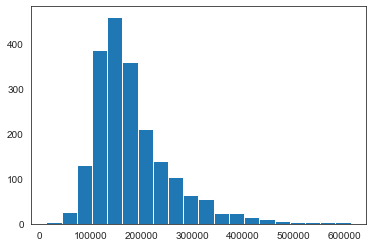

In [4389]:
plt.hist(full_train["SalePrice"], bins=20);

Based on the histogram plot of sale price above, it is seen that the data has extreme high values. Most of the mass of the data is on the right hand side, indicating that the distribution is positive skewed. This suggests that the data contains a lot of outliers. 

Considering that the size of the property is important when it comes to property prices, I will look at "SalePrice", "Gr Liv Area" and "Total Bsmt SF" for outliers. 

In [4390]:
full_train.shape

(2029, 76)

In [4391]:
housing = full_train.copy()

In [4392]:
def subplot_regscatter(dataframe, list_of_columns, list_of_labels, main_title, list_of_subtitles=None):
    sns.set_style("white")
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12, nrows*5)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, columns in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        sns.regplot(x=columns[0], y=columns[1], data=dataframe, ax=ax[i], ci=None, color="palevioletred", line_kws={"color": "midnightblue"}, scatter_kws={"s":50}) 
        ax[i].set_xlabel(list_of_labels[i][0], fontsize=12)
        ax[i].set_ylabel(list_of_labels[i][1], fontsize=12)
    
    if len(list_of_columns) % 2 != 0:
        plt.delaxes(ax=ax[len(list_of_columns)])
    
    plt.suptitle(main_title, fontsize=20, fontweight="bold" )
    fig.tight_layout(pad=2)
    
    return plt.show()

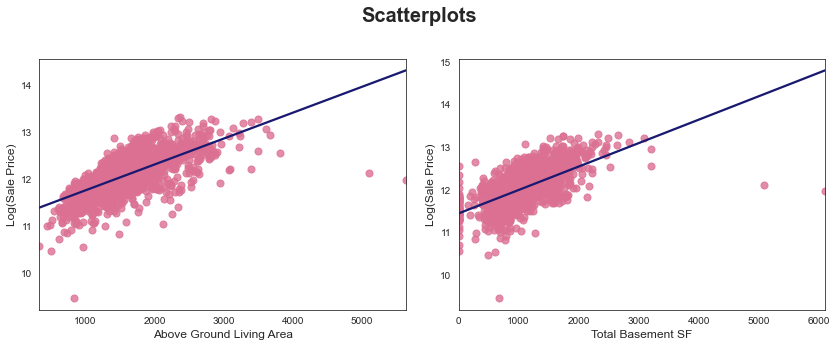

In [4393]:
housing["log_saleprice"] = housing["SalePrice"].map(lambda x: np.log(x))
list_of_columns = [("Gr Liv Area", "log_saleprice"), 
                   ("Total Bsmt SF", "log_saleprice")]
                
list_of_labels = [("Above Ground Living Area", "Log(Sale Price)"), 
                  ("Total Basement SF", "Log(Sale Price)")]
                  
subplot_regscatter(housing, 
                   list_of_columns, 
                   list_of_labels, 
                   "Scatterplots", 
                   list_of_subtitles=None)

There are  outliers that are observed in the above ground living area and total basement sf with respect to sale prices. 

1 of the outliers belong to a property in Oldtown. This property has a much higher above ground living area than the average property size in the neighbourhood. Despite a larger living area, the sale priceis much lower than the neighbourhood average. 

2 of the other outliers belong to properties in Edward. These properties too have a much higher above ground living area than the average property size in the neighbourhood. Even so, their sale prices are lower than the neighbourhood average. 

Will drop these outliers from the analysis.

In [4394]:
housing[["Id", "Neighborhood", "Garage Area", "Gr Liv Area", "SalePrice", "log_saleprice"]].\
sort_values(by="log_saleprice", ascending=True).head()

,Id,Neighborhood,Garage Area,Gr Liv Area,SalePrice,log_saleprice
108,182,OldTown,780.0,832,12789,9.456341
281,2844,Edwards,216.0,498,35000,10.463103
861,710,OldTown,0.0,968,37900,10.542706
848,1902,BrkSide,0.0,334,39300,10.578980
139,709,OldTown,308.0,612,45000,10.714418


In [4395]:
housing[["Id", "Neighborhood", "Garage Area", "Gr Liv Area", "SalePrice", "log_saleprice"]].\
sort_values(by="Gr Liv Area", ascending=False).head()

,Id,Neighborhood,Garage Area,Gr Liv Area,SalePrice,log_saleprice
1453,1499,Edwards,1418.0,5642,160000,11.982929
1254,2181,Edwards,1154.0,5095,183850,12.121875
1001,1498,Edwards,624.0,3820,284700,12.559191
80,2738,Edwards,836.0,3672,415000,12.936034
859,2667,OldTown,840.0,3608,475000,13.071070


In [4396]:
housing.groupby("Neighborhood")[["Gr Liv Area", "Total Bsmt SF", "SalePrice"]].mean().\
sort_values(by="SalePrice", ascending=False)

,Gr Liv Area,Total Bsmt SF,SalePrice
Neighborhood,,,
StoneBr,1981.710526,1534.289474,329675.736842
NridgHt,1944.795082,1633.590164,322831.352459
NoRidge,2456.833333,1406.562500,316294.125000
GrnHill,1398.500000,751.000000,280000.000000
Veenker,1798.058824,1458.470588,253570.588235
Timber,1660.312500,1357.916667,241051.354167
Somerst,1582.776923,1177.561538,227183.900000
ClearCr,1796.185185,1209.000000,217490.074074
Crawfor,1704.464789,1049.704225,205901.211268


In [4397]:
def drop_outliers(dataframe):
    index_outliers = dataframe[(dataframe["Id"] == 182)|
                               (dataframe["Id"] == 1499)|
                               (dataframe["Id"] == 2181)].index
    dataframe = dataframe.drop(index_outliers).reset_index(drop=True)
    return dataframe

In [4398]:
housing = drop_outliers(housing)

In [4399]:
train, holdout = train_test_split(housing, train_size=0.8, random_state=42)

## 4. Exploratory Data Analysis: Numerical Features
---

## 4.1. All Features

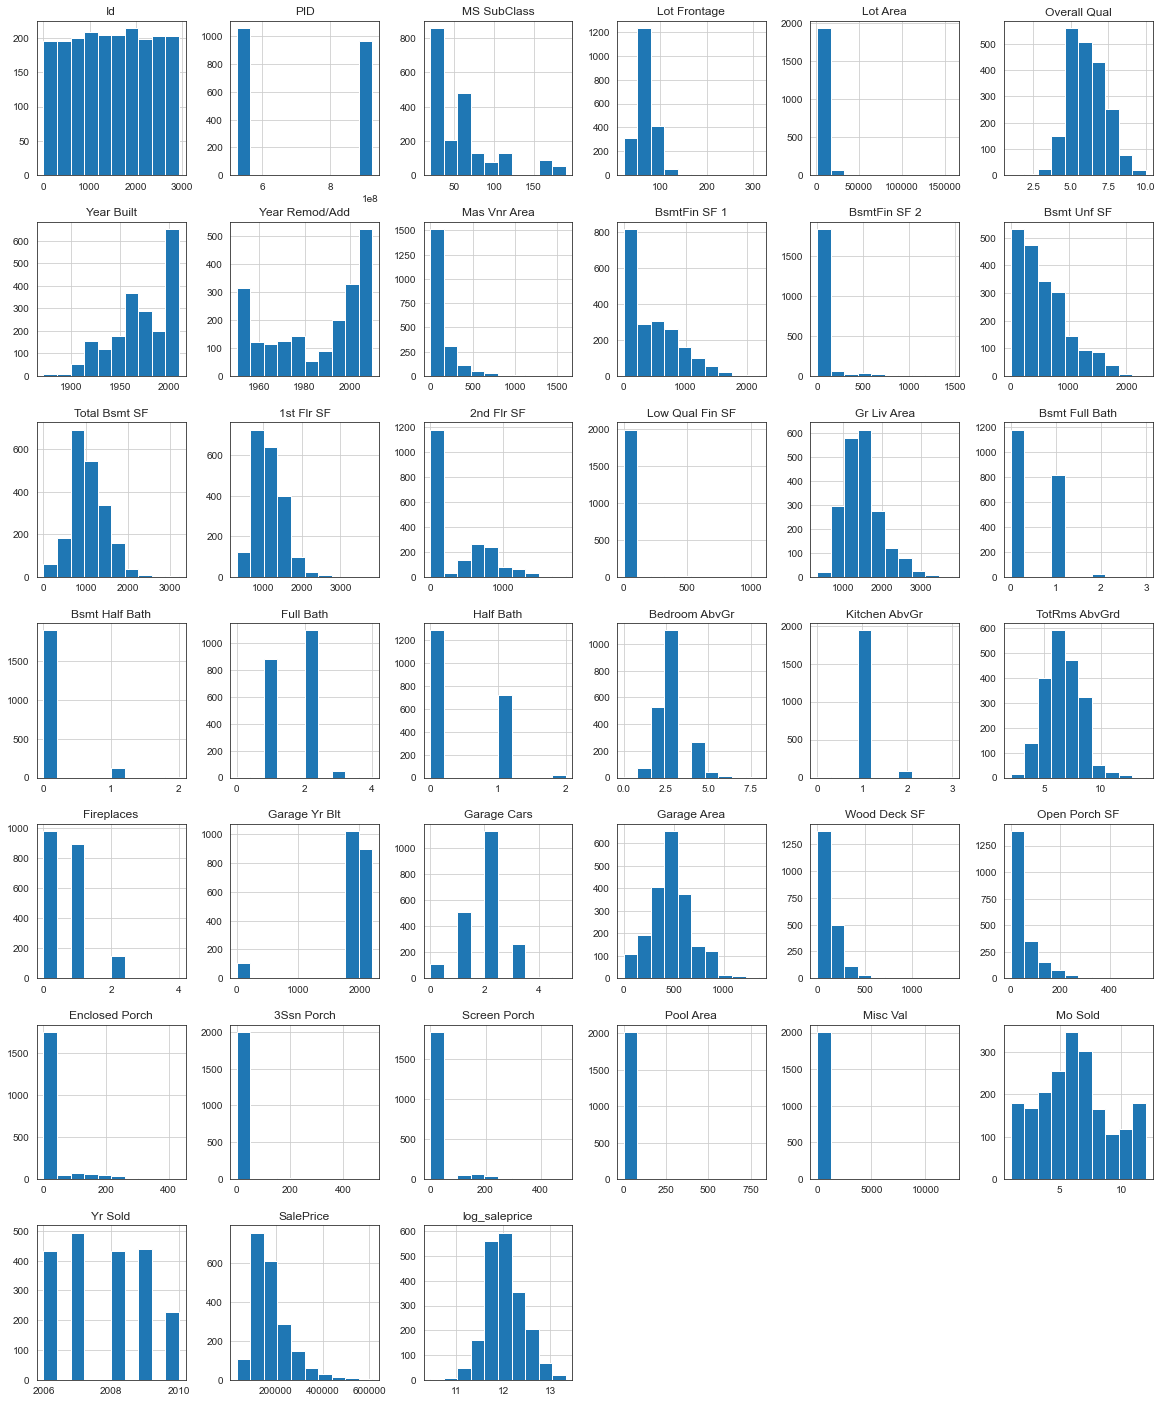

In [4400]:
housing.hist(figsize=(20, 25));

The distributions for most numerical features seem to be positively skewed. The features that have positively skewed distributions are Mas Vnr Area, Bsmt Fin SF1, Bsmt Fin SF2, Bsmt Unf SF, Total Bsmt SF, 1st Flr SF, 2nd Flr SF, GR Liv Area, Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch, Screen Porch and SalePrice.

## 4.2. Sale Price

In [4401]:
# create a function to plot histograms
def plot_histogram(dataframe, list_of_columns, list_of_xlabels, bins, main_title, n):
    sns.set_style("white")
    nrows = int(np.ceil(len(list_of_columns)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(14, nrows*5))
    ax = ax.ravel()
    
    for i, column in enumerate(list_of_columns):
        ax[i].hist(dataframe[column], color="cornflowerblue", bins=bins)
        ax[i].axvline(np.mean(dataframe[column]), color="mediumvioletred", linewidth=2, label="Mean")
        ax[i].axvline(np.median(dataframe[column]), color="teal", linestyle="dashed", linewidth=2, label="Median")
        ax[i].legend()
        #ax[i].set_title(list_of_subtitles[i], fontsize=15)
        ax[i].set_xlabel(list_of_xlabels[i])
    
    if len(list_of_columns) % 2 != 0:
        plt.delaxes(ax=ax[len(list_of_columns)])
    
    plt.xticks(rotation=n)
    plt.suptitle(main_title, fontsize=20, fontweight="bold")
    fig.tight_layout(pad=2)
    
    return plt.show()

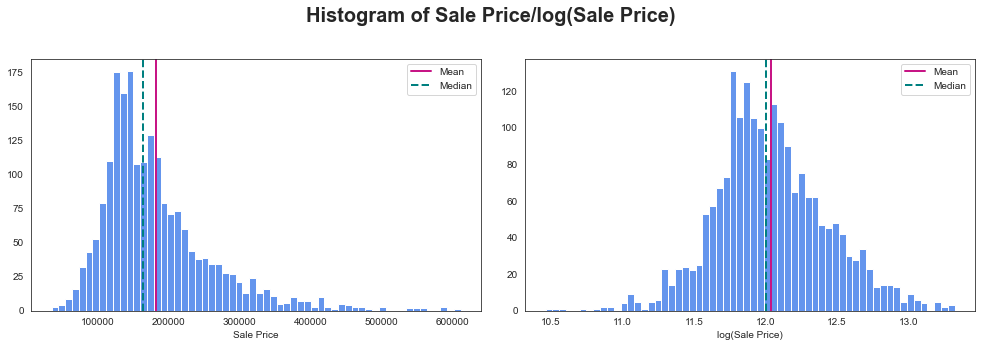

In [4402]:
# log the saleprice and then compare the distribution for both log_saleprice and saleprice
housing["log_saleprice"] = housing["SalePrice"].map(lambda x: np.log(x))

# plot the histogram for the dependant variable
plot_histogram(housing, 
               ["SalePrice", "log_saleprice"], 
               ["Sale Price", "log(Sale Price)"], 
               60, 
               "Histogram of Sale Price/log(Sale Price)", 
               0)

The mean for sale price is higher than its median. Most of the data in the sale price distribution is focused on the right hand side. Thus, indicating that the sale price distribution is skewed to the right.

By taking log transformation of the sale price, the skewness of the distribution is reduced. There are less extreme values. The mean after the log transformation is closer to its median. The log sale price resembles a normal distribution.

For the model, log sale price will be used.

## 4.3. Combining Numerical Features

There are a number of features that will be combined.

### 1) The Total Area

The size of the home is expected to be one of the most important factors in determining property prices. For this analysis, I will combine similar features together in order to get the total area of living space. To get the area of the property, GR Liv Area, Total Bsmt SF, Garage Area and Low Qual Fin SF will be combined. A property with a larger size is expected to lead to a higher selling price.

### 2) Total Number of Bathrooms

In order to get the total number of bathrooms in the property, I will combine Bsmt Full Bath, Bsmt Half Bath, Full Bath and Half Bath. More bathrooms in the property is expected to lead to a higher selling price.

### 3) Porch Area 

To get the total porch area in the property, I will combine Wood Deck SF, Open Porch SF, Enclosed Porch, 3Ssn Porch and Screen Porch. A bigger porch area is expected to lead to a higher selling price.

### 4) House Age

To get the age of the property, I will combine Yr Sold and Year Built features. It is expected that the newer the properties are, the higher the selling price will be.

### 5) Last Remodel

Yr Sold and Year Remod/Add features are combined to get the number of years since the property was last remodelled. It is expected that the more recent the remodelling is, the higher the selling price will be.

In [4403]:
# create a function to combine features
def transform_numfeatures(dataframe):
    dataframe["total_liv"] = dataframe["Gr Liv Area"] +\
                            dataframe["Total Bsmt SF"] -\
                            dataframe["Low Qual Fin SF"]
    dataframe["log_total_liv"] = dataframe["total_liv"].map(lambda x: np.log(x))
    
    dataframe["total_area"] = dataframe["Gr Liv Area"] +\
                            dataframe["Total Bsmt SF"] -\
                            dataframe["Low Qual Fin SF"] +\
                            dataframe["Garage Area"]
    dataframe["log_total_area"] = dataframe["total_area"].map(lambda x: np.log(x))
   
    dataframe["total_baths"] = dataframe["Bsmt Full Bath"] +\
                            dataframe["Bsmt Half Bath"] +\
                            dataframe["Full Bath"] +\
                            dataframe["Half Bath"] 
    
    
    dataframe["total_baths_sq"] = dataframe["total_baths"] * dataframe["total_baths"]
    
    dataframe["house_age"] = dataframe["Yr Sold"] - dataframe["Year Built"]
    dataframe["last_remodel"] = dataframe["Yr Sold"] - dataframe["Year Remod/Add"]
    
    dataframe["porch_area"] = dataframe["Wood Deck SF"] +\
                            dataframe["Open Porch SF"] +\
                            dataframe["Enclosed Porch"] +\
                            dataframe["3Ssn Porch"] +\
                            dataframe["Screen Porch"] 
  
    try:
        dataframe["log_saleprice"] = dataframe["SalePrice"].map(lambda x: np.log(x))
        return dataframe
    except KeyError:
        return dataframe

In [4404]:
housing = transform_numfeatures(housing)
train = transform_numfeatures(train)
holdout = transform_numfeatures(holdout)

<ipython-input-4403-812a32115a47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["total_liv"] = dataframe["Gr Liv Area"] +\
<ipython-input-4403-812a32115a47>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["log_total_liv"] = dataframe["total_liv"].map(lambda x: np.log(x))
<ipython-input-4403-812a32115a47>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

### Total Area

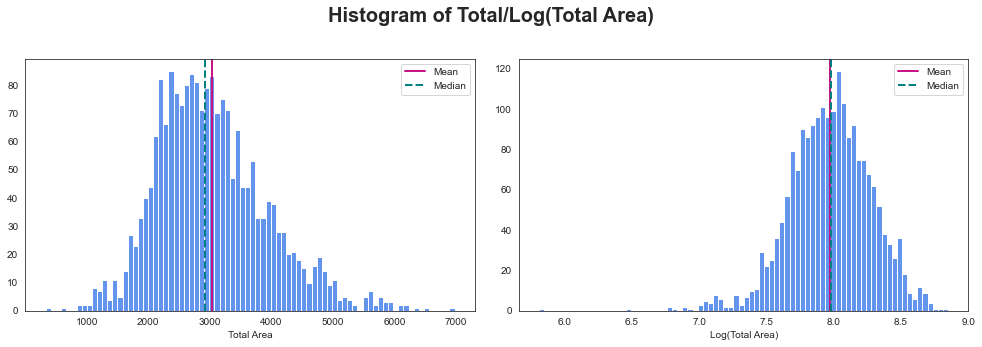

In [4405]:
plot_histogram(housing, 
               ["total_area", "log_total_area"], 
               ["Total Area", "Log(Total Area)"], 
               80, 
               "Histogram of Total/Log(Total Area)", 
               0)

The mean for total area is higher than its median.

By taking log transformation of the total living area, the skewness of the distribution is reduced.  The mean is now closer to its median.

For the model, log total area will be used.

### Other Features

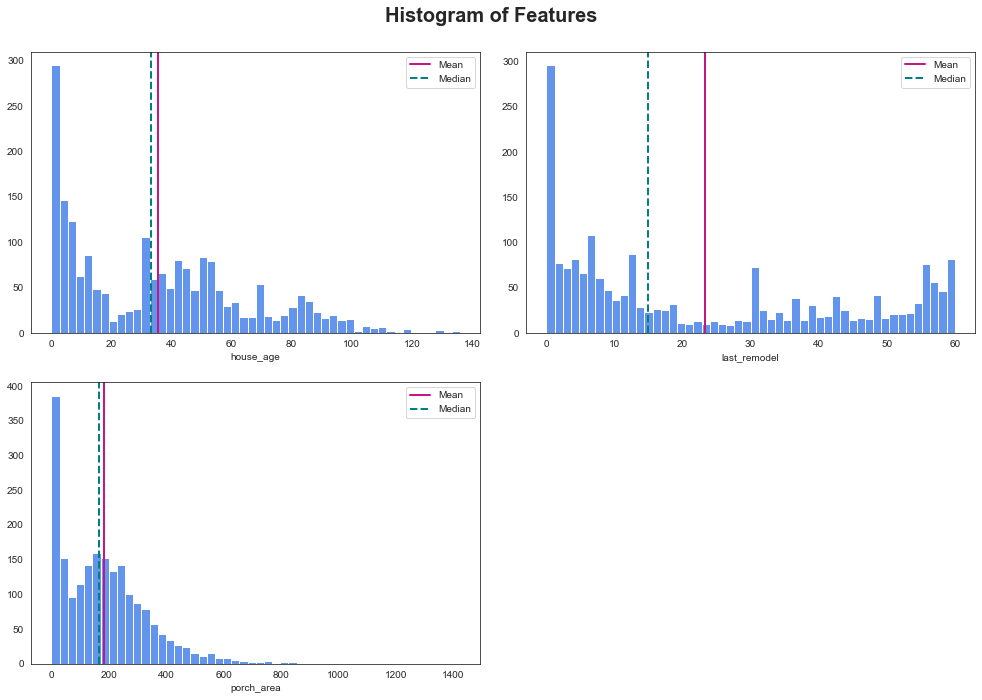

In [4406]:
# plot the histogram for the variables
hist_variables = ["house_age", "last_remodel", "porch_area"]

plot_histogram(housing, 
               hist_variables, 
               hist_variables, 
               50, 
               "Histogram of Features", 
               0)

Porch area, house age and last remodel have a distribution in which their means are higher than their respective medians. Most of the mass of these distributions are on the right hand side. Thus, indicating that these distributions are positively skewed.

## 5. Exploratory Data Analysis: Categorical Features
---

## 5.1. Categorical Features

### Overall Quality

In [4407]:
def plot_boxplot(dataframe, x_variable, y_variable, labels, subtitle, n):
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(15, 6))
    sns.boxplot(x=x_variable, y=y_variable, data=dataframe, orient="v", ax=ax)
    ax.set_title(subtitle, fontsize=20, fontweight="bold")
    ax.set_xlabel(labels[0], fontsize=15)
    ax.set_ylabel(labels[1], fontsize=15)
    plt.xticks(rotation=n)
    
    return plt.show()

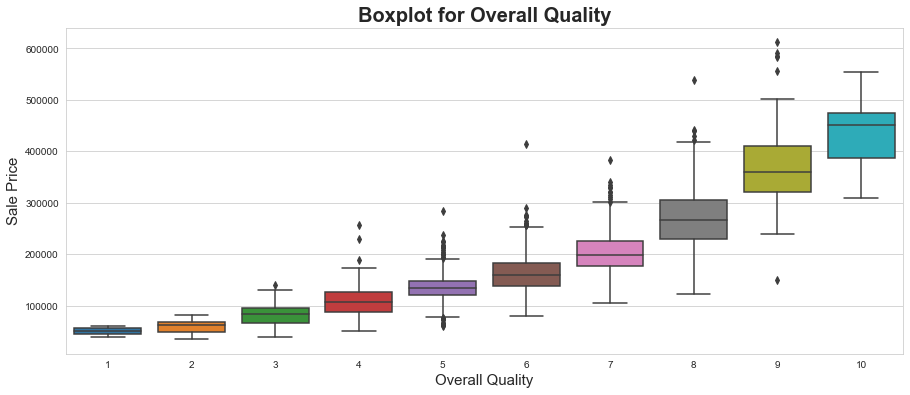

In [4408]:
plot_boxplot(housing, 
             "Overall Qual", 
             "SalePrice", 
             ["Overall Quality", "Sale Price"], 
             "Boxplot for Overall Quality", 
             0);

Overall quality is highly correlated with the sale price. As the level of overall quality increases, the median selling price gets higher. Quality level 10 has the highest median selling price, slighly higher than level 9. Compared to the other quality levels, level 5-7 seem to have the most outliers.

### Overall Condition

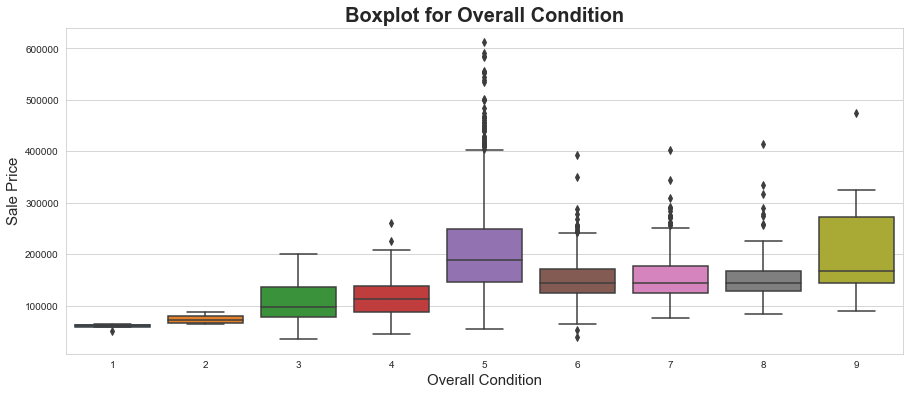

In [4409]:
plot_boxplot(housing, 
             "Overall Cond", 
             "SalePrice", 
             ["Overall Condition", "Sale Price"], 
             "Boxplot for Overall Condition", 
             0);

The condition with the highest median selling price is condition 5. This is quite unexpected as one would expect level 9 to have the highest median selling price.

### MS SubClass

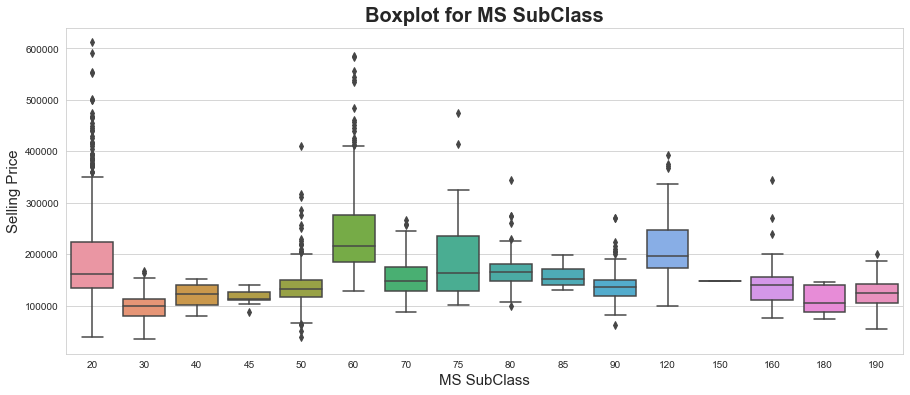

In [4410]:
plot_boxplot(housing, 
             "MS SubClass", 
             "SalePrice", 
             ["MS SubClass", "Selling Price"], 
             "Boxplot for MS SubClass", 0);

Class 60 has the highest median selling price, followed by class 120.

### External Quality

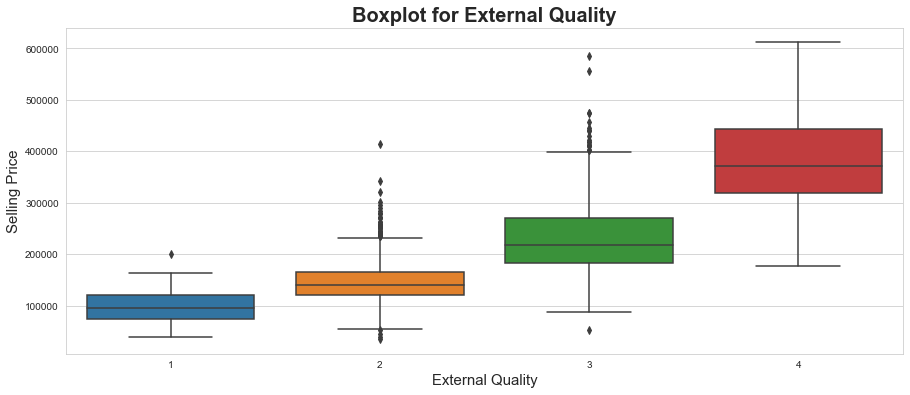

In [4411]:
ordinal_dict = {
    'Ex': 4,
    'Gd': 3,
    'TA': 2, 
    "Fa": 1}
housing["ord_exter_qual"] = housing["Exter Qual"].map(ordinal_dict)
plot_boxplot(housing, 
             "ord_exter_qual", 
             "SalePrice", 
             ["External Quality", "Selling Price"], 
             "Boxplot for External Quality", 
             0);

The median selling price increases as the exterior quality of the home improves. Level 4 has the highest median out of all the levels. 

### Kitchen Quality

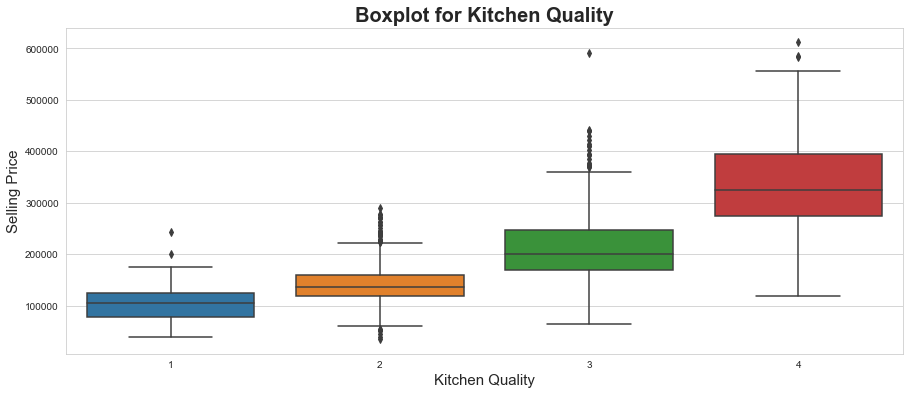

In [4412]:
housing["ord_kit_qual"] = housing["Kitchen Qual"].map(ordinal_dict)

plot_boxplot(housing, 
             "ord_kit_qual", 
             "SalePrice", 
             ["Kitchen Quality", "Selling Price"], 
             "Boxplot for Kitchen Quality", 0);

The median selling price increases as the kitchen quality improves. Level 4 has the highest median selling price and the widest interquartile range.

### Basement Exposure

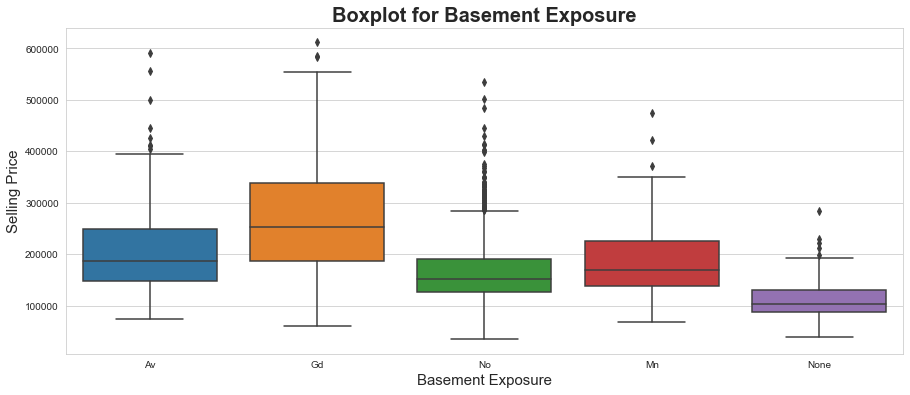

In [4413]:
plot_boxplot(housing, 
             "Bsmt Exposure", 
             "SalePrice", 
             ["Basement Exposure", "Selling Price"], 
             "Boxplot for Basement Exposure", 
             0);

Good basement exposure has the highest median selling price and widest interquartile range compared to the other types of exposure.

### MS Zoning

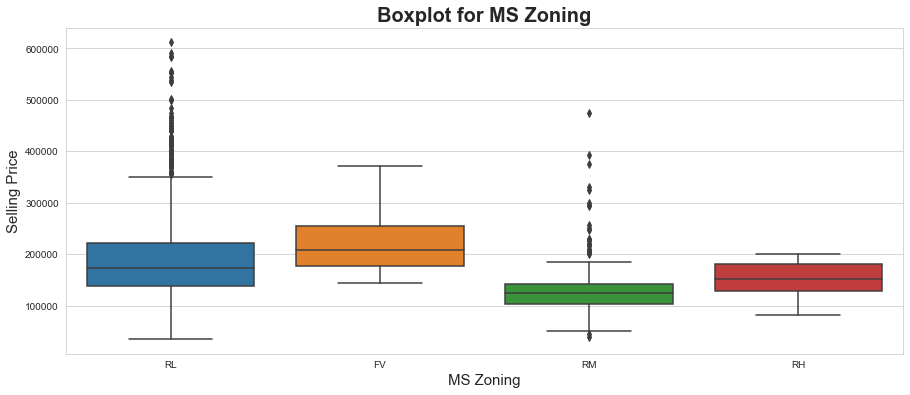

In [4414]:
plot_boxplot(housing, 
             "MS Zoning", 
             "SalePrice", 
             ["MS Zoning", "Selling Price"], 
             "Boxplot for MS Zoning", 
             0);

Floating village residential(FV) has the highest median selling price, followed by residential low density(RL). There seems to be a lot of outliers for RL.

### Land Contour

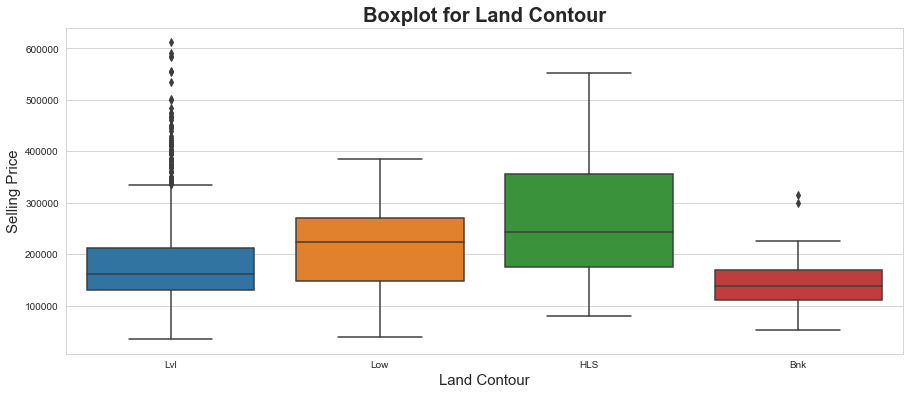

In [4415]:
plot_boxplot(housing, 
             "Land Contour", 
             "SalePrice", 
             ["Land Contour", "Selling Price"], 
             "Boxplot for Land Contour", 
             0);

HLS has the highest median selling price and widest interquartile range. Lvl has the most outliers.

### Foundation

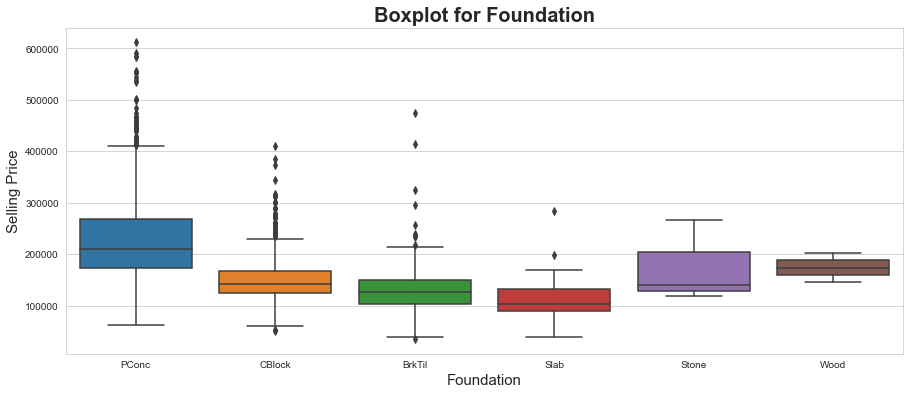

In [4416]:
plot_boxplot(housing, 
             "Foundation", 
             "SalePrice", 
             ["Foundation", "Selling Price"], 
             "Boxplot for Foundation", 0);

PConc has the highest median and the widest interquartile range compared to the rest.

### Heating QC

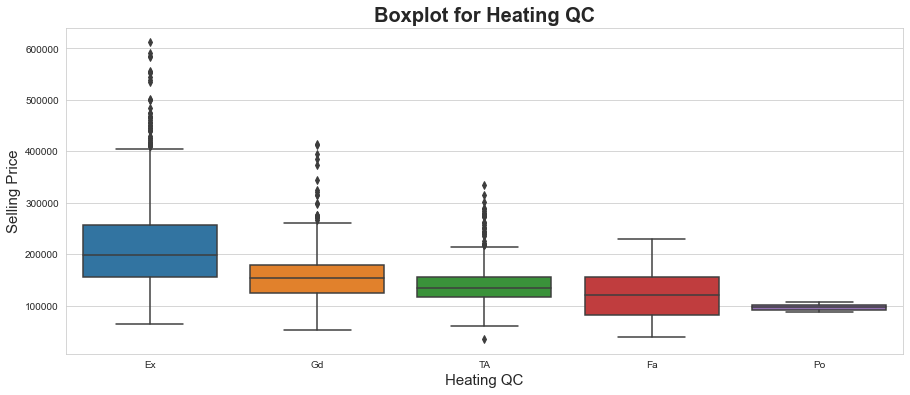

In [4417]:
plot_boxplot(housing, 
             "Heating QC", 
             "SalePrice", 
             ["Heating QC", "Selling Price"], 
             "Boxplot for Heating QC", 0);

Excellent heating quality has the highest median selling price and widest interquartile range.

### Central Air

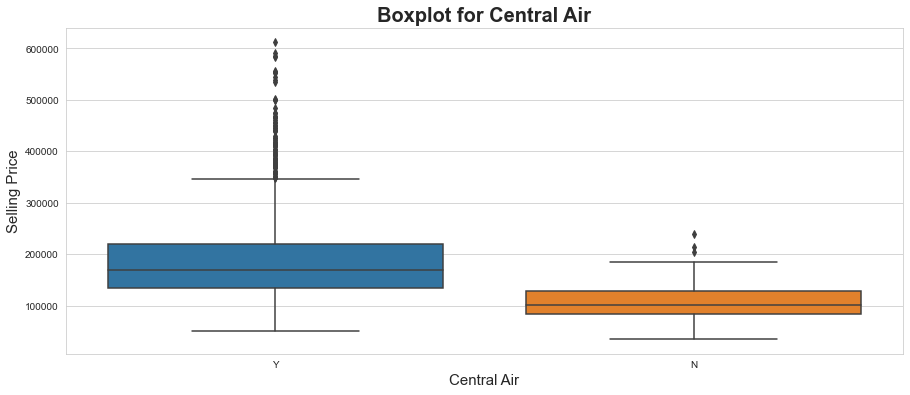

In [4418]:
plot_boxplot(housing, 
             "Central Air", 
             "SalePrice", 
             ["Central Air", "Selling Price"], 
             "Boxplot for Central Air", 
             0);

Houses with central airconditioner has a higher median selling price.

### Garage Type

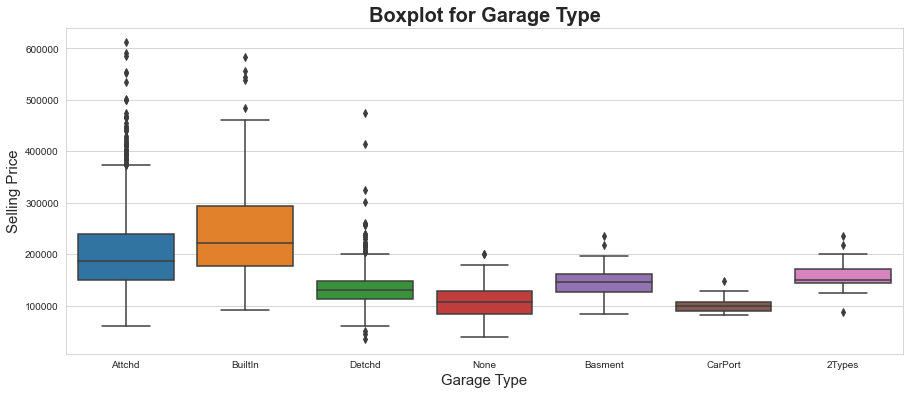

In [4419]:
plot_boxplot(housing, 
             "Garage Type", 
             "SalePrice", 
             ["Garage Type", "Selling Price"], 
             "Boxplot for Garage Type", 
             0);

Houses with a builtin garage has a higher median selling price, followed by houses with an attached garage.

### Paved Drive

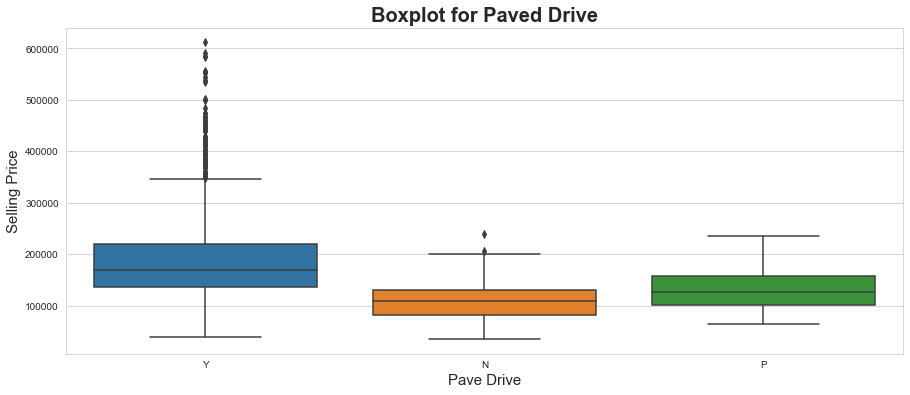

In [4420]:
plot_boxplot(housing, 
             "Paved Drive", 
             "SalePrice", 
             ["Pave Drive", "Selling Price"], 
             "Boxplot for Paved Drive", 
             0);

Houses with a paved driveway has a higher median selling price.

### Sale Type

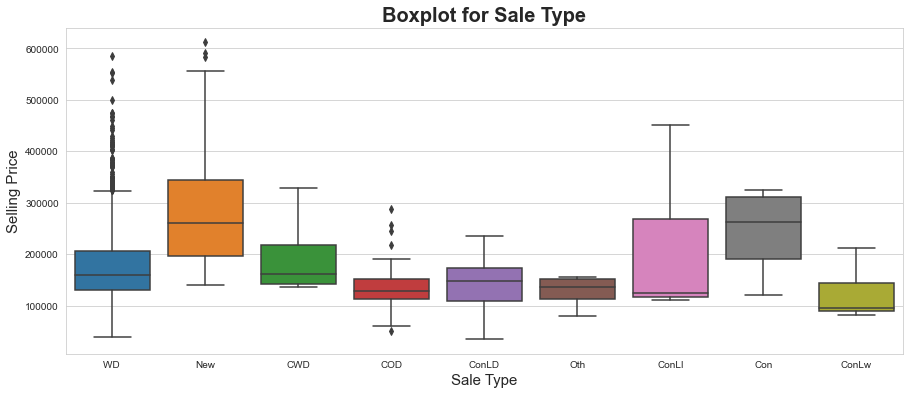

In [4421]:
plot_boxplot(housing, 
             "Sale Type", 
             "SalePrice", 
             ["Sale Type", "Selling Price"], 
             "Boxplot for Sale Type", 
             0);

Contract and new sale types have a higher median selling price.

### Has Open Porch

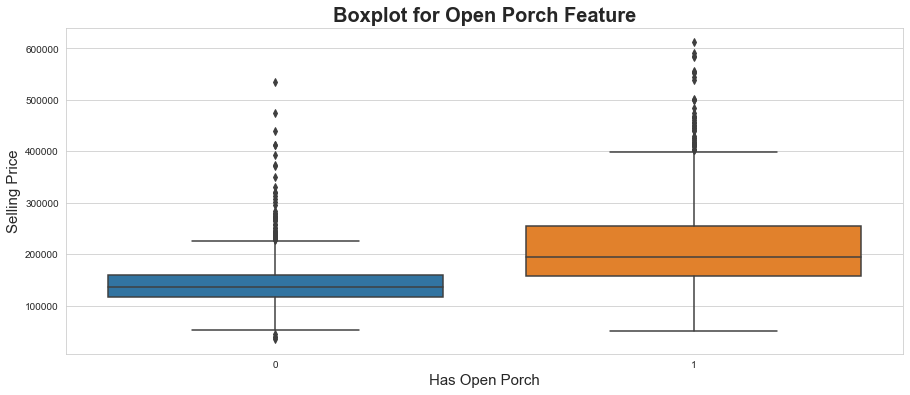

In [4422]:
# if open porch area is 0 assign 0 (means no open porch), else is 1
housing["has_open_porch"] = housing["Open Porch SF"].map(lambda x: 0 if x == 0 else 1)

plot_boxplot(housing, 
             "has_open_porch", 
             "SalePrice", 
             ["Has Open Porch", "Selling Price"], 
             "Boxplot for Open Porch Feature", 
             0);

Houses with an open porch feature have a higher median selling price.

### Near Parks

In [4423]:
# if property is near park assign 1, else is 0
def conditions_park(dataframe):
    if (dataframe["Condition 1"] == "PosN" and 
        dataframe["Condition 2"] == "PosN") or\
    (dataframe["Condition 1"] == "PosA" and 
     dataframe["Condition 2"] == "PosA"):
        return 1
    else:
        return 0
    
housing["near_park"] = housing.apply(conditions_park, axis=1)

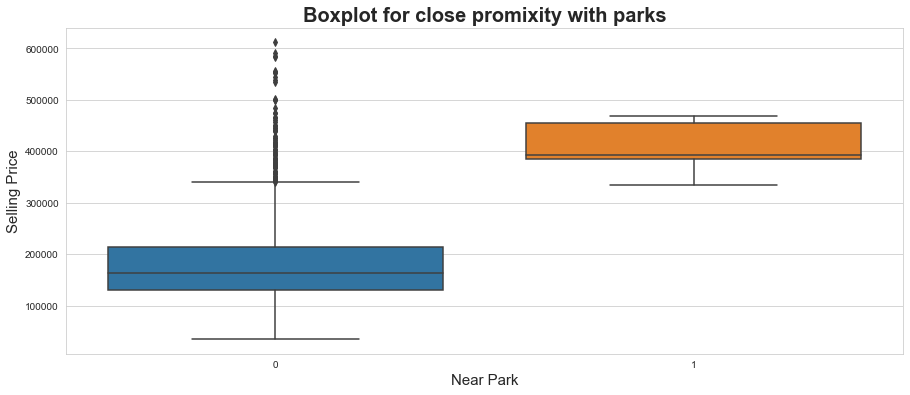

In [4424]:
plot_boxplot(housing, 
             "near_park", 
             "SalePrice", 
             ["Near Park", "Selling Price"], 
             "Boxplot for close promixity with parks", 
             0);

Properties that are near parks have a higher median selling price. These properties are located in low density areas in the more "prestigious" neighbourhood (aka zone 4). 

In [4425]:
housing[housing["near_park"] == 1][["Neighborhood", "MS Zoning", "SalePrice"]]

,Neighborhood,MS Zoning,SalePrice
425,NridgHt,RL,385000
940,StoneBr,RL,455000
1170,Somerst,RL,468000
1195,Timber,RL,392000
1812,StoneBr,RL,334000


### Neighbourhood

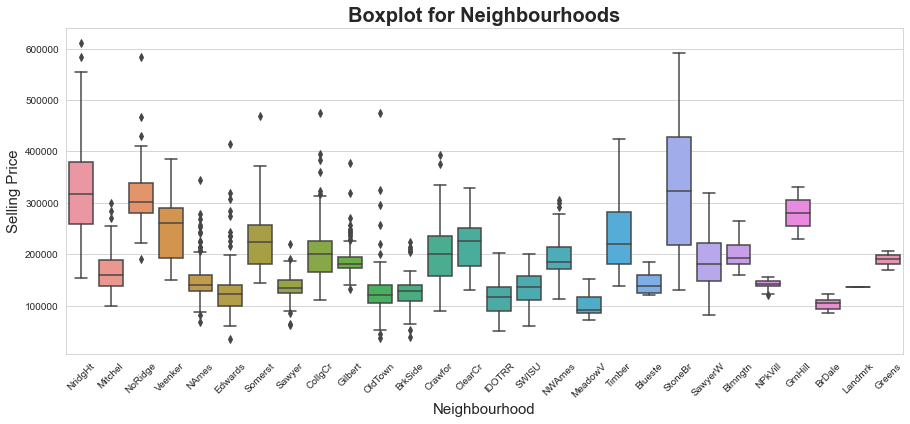

In [4426]:
plot_boxplot(housing, 
             "Neighborhood", 
             "SalePrice", 
             ["Neighbourhood", "Selling Price"], 
             "Boxplot for Neighbourhoods", 
             45);

NridgHt and StonrBr have the highest median selling prices. On the other hand, BrDale and MeadowV have the lowest median selling prices. As location is deemed to be one of the most important factors in determining property prices, I will dive more into this.

In [4427]:
# group by neighbourhood and find the mean selling price and mean SF area of the house
# use train set
neighbourhood = train.groupby(["Neighborhood"], as_index=False).\
                agg(price_mean = ("SalePrice", "mean"),
                price_max = ("SalePrice", "max"),
                price_min = ("SalePrice", "min"),
                price_median = ("SalePrice", "median"),
                total_area_mean = ("total_area", "mean"))

# find the mean price per square feet in each neighbourhood
neighbourhood["pricesf_mean"] = neighbourhood["price_mean"] /\
                                neighbourhood["total_area_mean"]
neighbourhood = neighbourhood.sort_values(by="price_mean", ascending=False).reset_index(drop=True)

neighbourhood

,Neighborhood,price_mean,price_max,price_min,price_median,total_area_mean,pricesf_mean
0,StoneBr,331857.607143,591587,130000,304500,4171.821429,79.547414
1,GrnHill,330000.000000,330000,330000,330000,3290.000000,100.303951
2,NridgHt,329901.077670,611657,154000,320000,4384.786408,75.237662
3,NoRidge,324277.950000,584500,190000,312500,4653.425000,69.685866
4,Veenker,256821.428571,385000,150000,265000,3958.428571,64.879642
5,Timber,245199.186047,425000,137500,231713,3668.930233,66.831248
6,Somerst,226857.962264,468000,144152,225000,3373.632075,67.244429
7,ClearCr,214760.545455,328000,130000,227500,3451.954545,62.214187
8,CollgCr,206329.244604,475000,110000,206000,3281.640288,62.873815
9,Crawfor,202216.684211,335000,90350,198000,3217.315789,62.852607


In order to get the location value for each neighbourhood, the neighbourhoods are grouped and then each group is assigned to one of the four different zones. Each zone would consist of neighbourhoods that have similar mean selling price.

Neighbourhoods that have higher than the overall average selling price (184,167) would be grouped and placed in the top zone. While the other neighbourhoods below the overall average selling price would be in the bottom zone. Based on the table above, there would be 15 neighbourhoods in the top zone, while the bottom zone would have 13 neighbourhoods.

Within the top zone, neighbourhoods would be split into zone 4 and 3 based on the mean selling price again. Neighbourhoods above the mean selling price of 233,098 would be in zone 4 while the rest would be in zone 3. 6  neighbourhoods would be in zone 4 while 9 would be in zone 3.

Within the bottom zone, neighbourhoods would be split into zone 1 and 2 based on the mean selling price. Neighbourhoods above the mean selling price of 135,836 would be in zone 2 while the rest would be in zone 1. 6 neighbourhoods would be in zone 2 and 7 neighbourhoods would be in zone 1.

In [4428]:
# overall mean selling price

train["SalePrice"].mean()

184167.01172839507

In [4429]:
top_list = list(neighbourhood["Neighborhood"][:15])
bottom_list = list(neighbourhood["Neighborhood"][15:])

# top zone mean selling price
train[train.Neighborhood.isin(top_list)]["SalePrice"].mean()

233098.18633540373

In [4430]:
# bottom zone mean selling price
train[train.Neighborhood.isin(bottom_list)]["SalePrice"].mean()

135836.21963190185

In [4431]:
# split the neighbourhoods into 4 different zones

def add_zones(dataframe, column):
    zone = []
    for i, v in enumerate(dataframe[column]):
        if i < 6:
            zone.append(4)
        elif (i >= 6) & (i < 15): 
            zone.append(3)
        elif (i >= 15) & (i < 21):
            zone.append(2)
        else:
            zone.append(1)
    return zone

In [4432]:
neighbourhood["zone"] = add_zones(neighbourhood, "Neighborhood")
housing = pd.merge(housing, neighbourhood, how="left", on="Neighborhood")

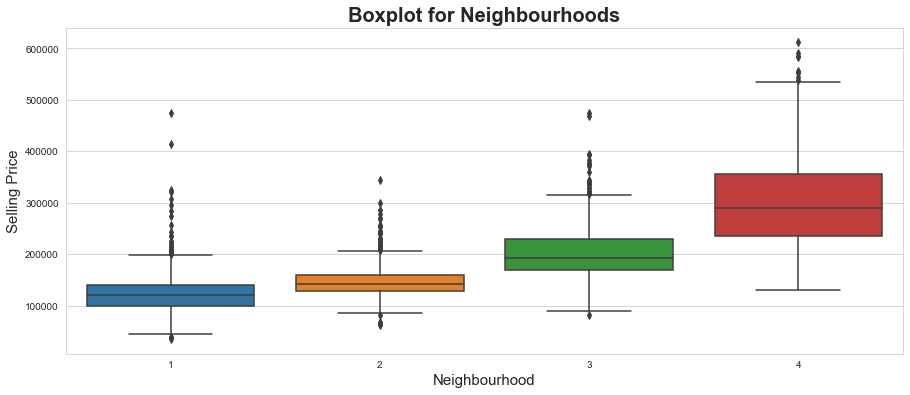

In [4433]:
# boxplot of new zones
plot_boxplot(housing, 
             "zone", 
             "SalePrice", 
             ["Neighbourhood", "Selling Price"], 
             "Boxplot for Neighbourhoods", 
             0);

Zone 4 clearly has the highest median selling price and widest interquartile range, followed by zone 3.

## 5.2 Transforming Categorical Features

In [4434]:
def transform_catfeatures(dataframe):
    # overall quality
    dataframe["ex_overall"] = dataframe["Overall Qual"].map(lambda x: 1 if (x == 10) or (x == 9) else 0)
    dataframe["gd_overall"] = dataframe["Overall Qual"].map(lambda x: 1 if (x == 8) or (x == 7) else 0)
    dataframe["ave_overall"] = dataframe["Overall Qual"].map(lambda x: 1 if (x == 4) or (x == 5) or (x == 6) else 0)
    dataframe["poor_overall"] = dataframe["Overall Qual"].map(lambda x: 1 if (x == 1) or (x == 2) or (x == 3) else 0)
    
    # overall condition
    dataframe["ave_cond"] = dataframe["Overall Cond"].map(lambda x: 1 if x == 5 else 0)
    dataframe["ex_cond"] = dataframe["Overall Cond"].map(lambda x: 1 if x == 9 else 0)
    dataframe["avebelow_cond"] = dataframe["Overall Cond"].map(lambda x: 1 if x <= 5 else 0)
    
    # external quality
    dataframe["ex_exter"] = dataframe["Exter Qual"].map(lambda x: 1 if x == "Ex" else 0)
    dataframe["exgd_exter"] = dataframe["Exter Qual"].map(lambda x: 1 if (x == "Ex") or (x == "Gd") else 0)
    
    # kitchen quality
    dataframe["exgd_kit"] = dataframe["Kitchen Qual"].map(lambda x: 1 if (x == "Ex") or (x == "Gd") else 0)
    dataframe["ex_kit"] = dataframe["Kitchen Qual"].map(lambda x: 1 if x == "Ex" else 0)
    
    # basement exposure
    dataframe["gd_expose"] = dataframe["Bsmt Exposure"].map(lambda x: 1 if x == "Gd" else 0)
    
    # heating quality
    dataframe["ex_heating"] = dataframe["Heating QC"].map(lambda x: 1 if x == "Ex" else 0)
    
    # foundation
    dataframe["conc_foundation"] = dataframe["Foundation"].map(lambda x: 1 if x == "PConc" else 0)
    
    # central air
    dataframe["has_central_air"] = dataframe["Central Air"].map(lambda x: 1 if x == "Y" else 0)

    # garage type
    dataframe["has_builtin"] = dataframe["Garage Type"].map(lambda x: 1 if x == "BuiltIn" else 0)
    
    # has paved drive
    dataframe["has_pavedrive"] = dataframe["Paved Drive"].map(lambda x: 1 if x == "Y" else 0)
    
    # sale type
    dataframe["new_sale"] = dataframe["Sale Type"].map(lambda x: 1 if x == "New" else 0)
    dataframe["con_sale"] = dataframe["Sale Type"].map(lambda x: 1 if x == "Con" else 0)
    
    # has open porch
    dataframe["has_open_porch"] = dataframe["Open Porch SF"].map(lambda x: 0 if x == 0 else 1)
    
    # external condition
    dataframe["ave_exter_cond"] = dataframe["Exter Cond"].map(lambda x: 1 if x == "TA" else 0)
    
    # MS Zoning
    dataframe["rl_zoning"] = dataframe["MS Zoning"].map(lambda x: 1 if x == "RL" else 0)
    
    # near parks
    dataframe["near_park"] = dataframe.apply(conditions_park, axis=1)
    
    try:
        dataframe["zone1"] = dataframe["zone"].map(lambda x: 1 if x == 1 else 0)
        dataframe["zone2"] = dataframe["zone"].map(lambda x: 1 if x == 2 else 0)
        dataframe["zone3"] = dataframe["zone"].map(lambda x: 1 if x == 3 else 0)
        dataframe["zone4"] = dataframe["zone"].map(lambda x: 1 if x == 4 else 0)
        return dataframe
    
    except KeyError:
        return dataframe

In [4435]:
# full train set
housing = transform_catfeatures(housing)

# train set
train = pd.merge(train, neighbourhood, how="left", on="Neighborhood")
train = transform_catfeatures(train)

# holdout set
holdout = pd.merge(holdout, neighbourhood, how="left", on="Neighborhood")
holdout = transform_catfeatures(holdout)

## 6. Exploratory Visualizations
---

Based on the correlation table below, there are a number of variables that are highly correlated with Sale Price. These include total_area, Garage Cars, exgd_exter and total_baths.

Will look at the heatmap containing these variables, as well as the newly transformed variables to see the correlation between the different variables.

In [4436]:
abs(housing.corr()["SalePrice"]).sort_values(ascending=False)[:40]

SalePrice          1.000000
log_saleprice      0.957456
total_area         0.854557
total_liv          0.827612
Overall Qual       0.800420
log_total_area     0.797523
log_total_liv      0.773949
price_mean         0.756747
price_median       0.754199
total_area_mean    0.736974
Gr Liv Area        0.717307
pricesf_mean       0.714792
ord_exter_qual     0.712927
ord_kit_qual       0.691534
zone               0.690628
Total Bsmt SF      0.660568
Garage Area        0.656047
price_min          0.648369
Garage Cars        0.646469
1st Flr SF         0.646086
exgd_exter         0.633229
zone4              0.608968
ave_overall        0.608645
total_baths        0.604007
exgd_kit           0.584690
ex_overall         0.579898
total_baths_sq     0.567247
Year Built         0.563964
house_age          0.563959
price_max          0.561764
ex_kit             0.557664
last_remodel       0.544055
Year Remod/Add     0.542831
Full Bath          0.531839
conc_foundation    0.525178
Mas Vnr Area       0

## 6.1. Heatmap

In [4437]:
# variables that we will look in the heatmap below
heatmap_variables = ["SalePrice", "zone1", "zone2", "zone3", 
                     "zone4", "total_area", "porch_area",
                     "Garage Cars", "house_age", "last_remodel", "total_baths", 
                     "TotRms AbvGrd", "Fireplaces", "ex_overall", "gd_overall",
                     "ave_overall", "poor_overall", "ave_cond", "ex_cond", 
                     "exgd_exter", "exgd_kit", "gd_expose","ex_heating", 
                     "conc_foundation", "has_open_porch", "rl_zoning", "near_park"]
                    

# create a function to generate the heatmap
def plot_heatmap(dataframe, variables, title):
    fig, ax = plt.subplots(figsize=(40, 25))
    mask = np.zeros_like(dataframe[variables].corr(), dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(dataframe[variables].corr(), 
                cmap="PiYG",
                linewidths=0.2,
                vmin=-1,
                vmax=1,
                mask=mask, 
                square=True, 
                annot=True, 
                cbar_kws={
                    "orientation": "horizontal", 
                    "label": "Correlation", 
                    "shrink": 0.4, 
                    "aspect": 30})
    plt.title(title, fontweight="bold", fontsize=20)
    
    return plt.show()

<ipython-input-4437-d38e16ba59b6>:14: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(dataframe[variables].corr(), dtype=np.bool)


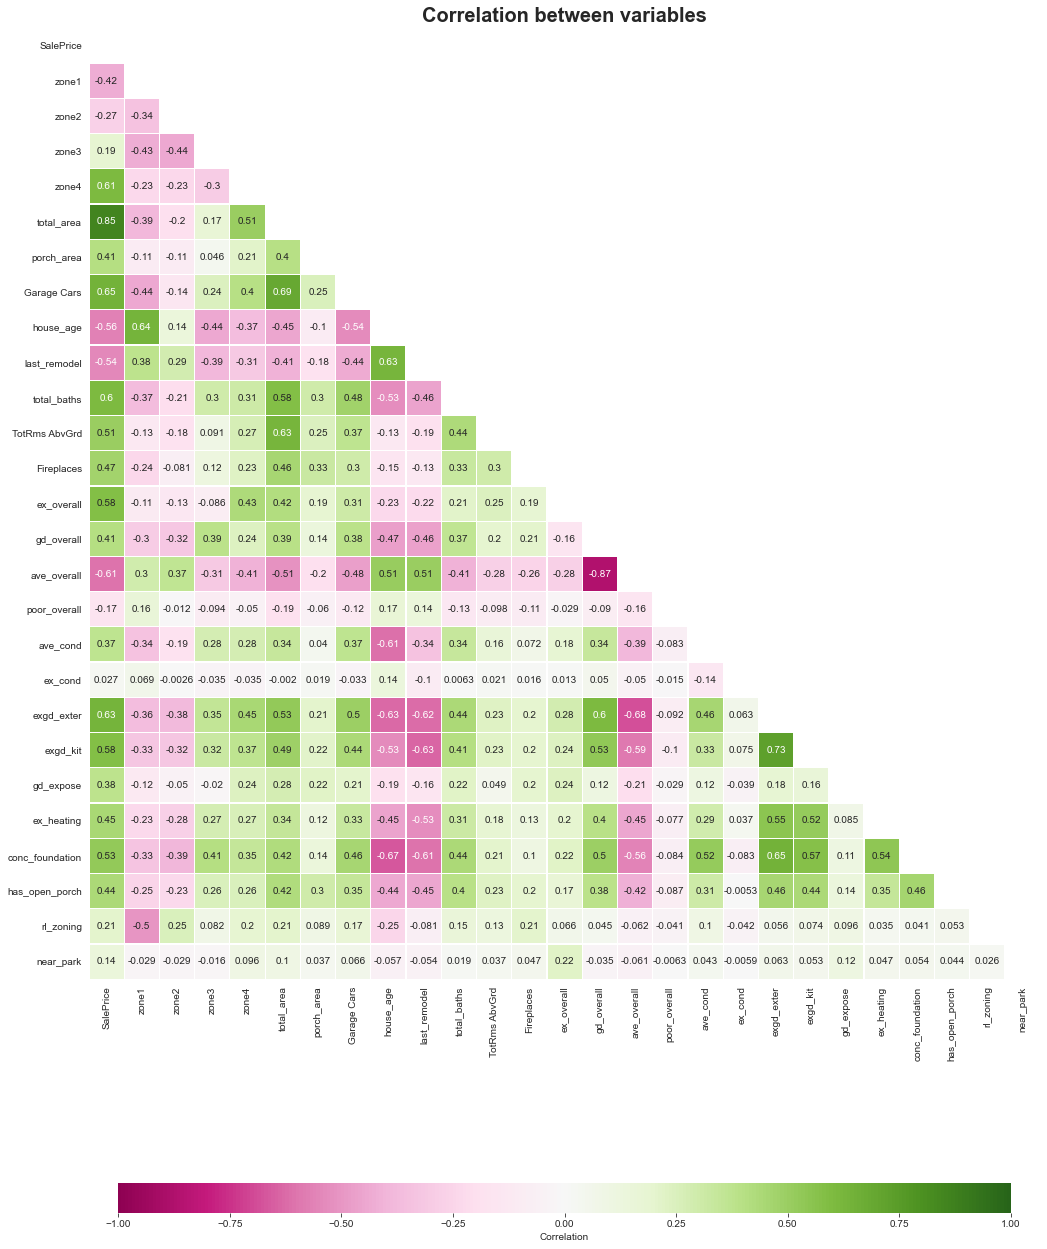

In [4438]:
plot_heatmap(housing, heatmap_variables, "Correlation between variables")

Based on the heatmap above, there are a number of variables that are highly correlated with each other. This includes  "last_remodel" with "house_age". 

To avoid multicollinearity issue, for some of these pair of highly correlated features, only 1 will be selected. For example, "TotRms AbvGrd" with "total_area" are highly correlated with each other. Hence, in this case, only "total_area" is chosen.

Zone 1 is the only variable that displays a moderately strong relationship with the dummy variable, rl_zoning. This negative relationship implies that a property in low density areas in zone 1 has a lower selling price.

## 6.2 Interactive Features

In this section, some of the variables will be combined with the low density area dummy (rl_zone) to see whether the new interactive variable will correlate better with price.

In [4439]:
# create a function to create interactive terms
def interactive_feat(dataframe):
    # zone 4
    dataframe["zone4_ave"] = dataframe["zone4"] * dataframe["ave_cond"] * dataframe["ave_exter_cond"]
    dataframe["zone4_avecond"] = dataframe["zone4"] * dataframe["ave_cond"]
    dataframe["zone4_avebelowcond"] = dataframe["zone4"] * dataframe["avebelow_cond"]
    dataframe["zone4_gdqual"] = dataframe["zone4"] * dataframe["gd_overall"]
    dataframe["zone4_rl"] = dataframe["zone4"] * dataframe["rl_zoning"]
    dataframe["zone4_ex"] = dataframe["zone4"] * dataframe["ex_overall"]
    dataframe["zone4_porch"] = dataframe["zone4"] * dataframe["has_open_porch"]
    
    # zone 3
    dataframe["zone3_rl"] = dataframe["zone3"] * dataframe["rl_zoning"]
    
    # zone 2
    dataframe["zone2_rl"] = dataframe["zone2"] * dataframe["rl_zoning"]
    
    # zone 1
    dataframe["zone1_aveall"] = dataframe["zone1"] * dataframe["ave_overall"]
    dataframe["zone1_rl"] = dataframe["zone1"] * dataframe["rl_zoning"]
    
    # rl
    dataframe["rl_baths"] = dataframe["total_baths"] * dataframe["rl_zoning"]
    dataframe["rl_avecond"] = dataframe["rl_zoning"] * dataframe["ave_cond"]
    dataframe["rl_park"] = dataframe["rl_zoning"] * dataframe["near_park"]
    dataframe["rl_remodel"] = dataframe["rl_zoning"] * dataframe["last_remodel"]
    dataframe["rl_age"] = dataframe["rl_zoning"] * dataframe["house_age"]
    dataframe["rl_fireplace"] = dataframe["rl_zoning"] * dataframe["Fireplaces"]
    dataframe["rl_room"] = dataframe["rl_zoning"] * dataframe["TotRms AbvGrd"]
    dataframe["rl_porch"] = dataframe["rl_zoning"] * dataframe["porch_area"]
    
    return dataframe

housing = interactive_feat(housing)
train = interactive_feat(train)
holdout = interactive_feat(holdout)

### Properties in low density areas in each zone

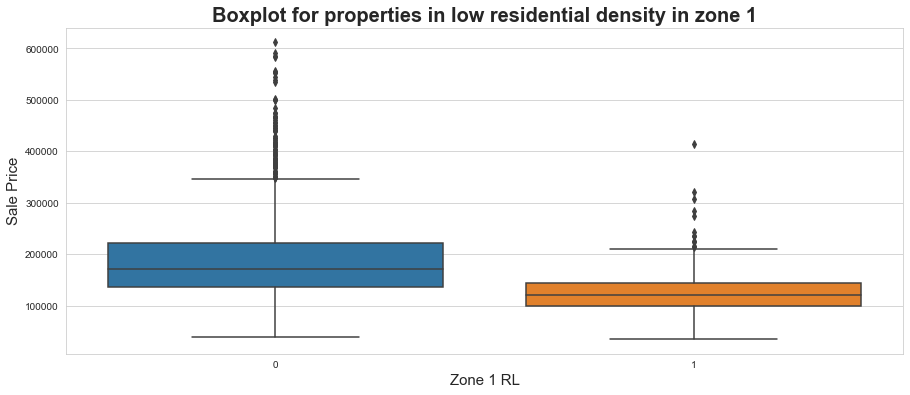

In [4440]:
plot_boxplot(housing, 
             "zone1_rl", 
             "SalePrice", 
             ["Zone 1 RL", "Sale Price"], 
             "Boxplot for properties in low residential density in zone 1", 
             0);

The median selling price of a property in low density areas in zone 1 is lower.

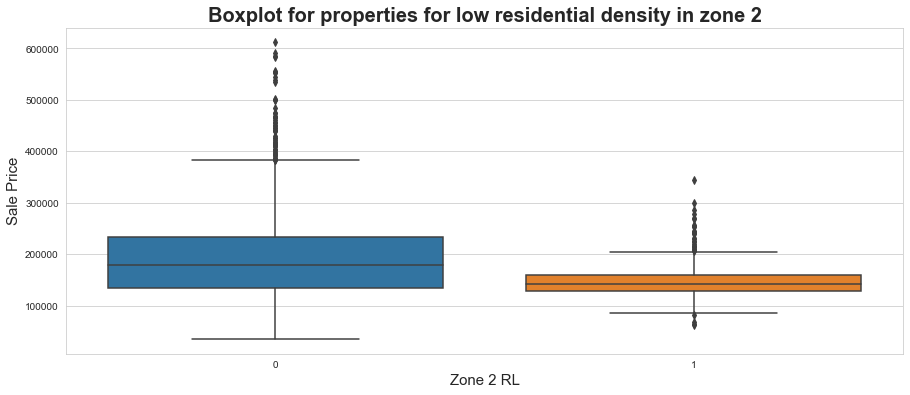

In [4441]:
plot_boxplot(housing, 
             "zone2_rl", 
             "SalePrice", 
             ["Zone 2 RL", "Sale Price"], 
             "Boxplot for properties for low residential density in zone 2", 
             0);

The median selling price of a property in low density areas in zone 2 is also lower.

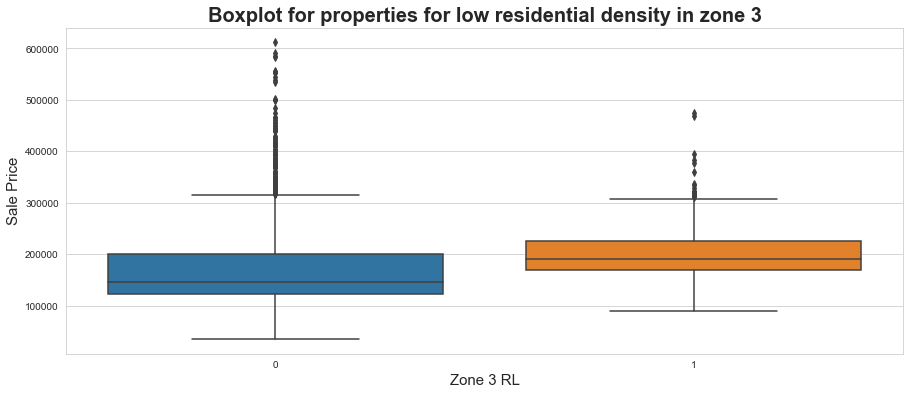

In [4442]:
plot_boxplot(housing, 
             "zone3_rl", 
             "SalePrice", 
             ["Zone 3 RL", "Sale Price"], 
             "Boxplot for properties for low residential density in zone 3", 
             0);

The median selling price of a property in low density areas in zone 3 is slightly higher.

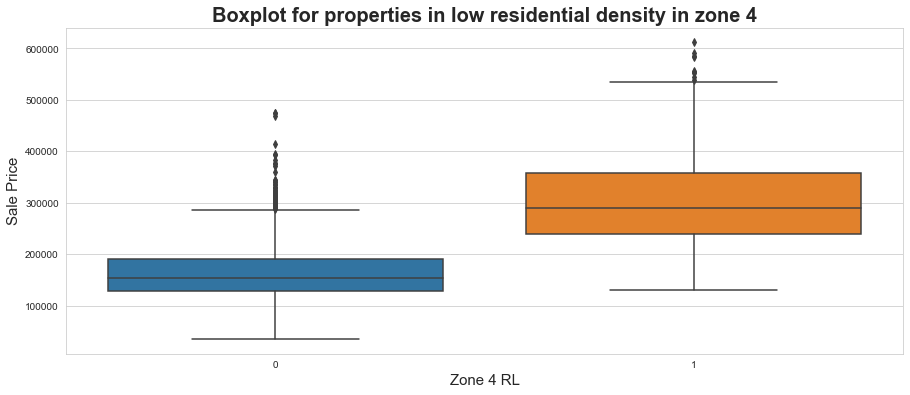

In [4443]:
plot_boxplot(housing, 
             "zone4_rl", 
             "SalePrice", 
             ["Zone 4 RL", "Sale Price"], 
             "Boxplot for properties in low residential density in zone 4", 
             0);

The median selling price of a property in low density areas in zone 4 is higher.

### Number of bathrooms in properties in low density areas

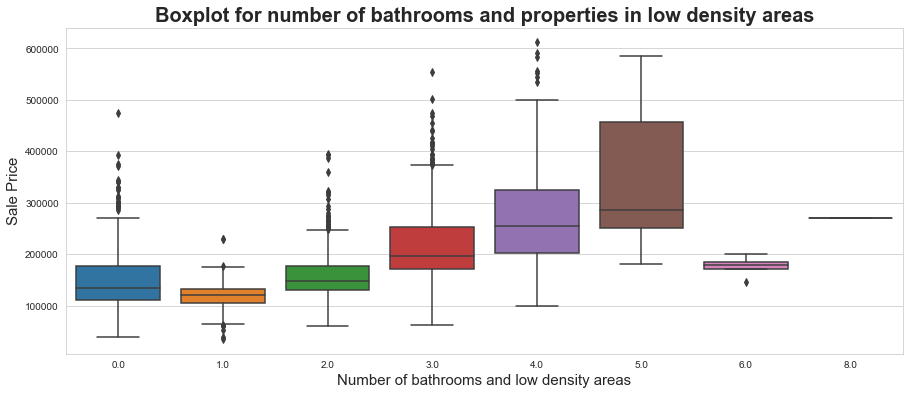

In [4444]:
plot_boxplot(housing, 
             "rl_baths", 
             "SalePrice", 
             ["Number of bathrooms and low density areas", "Sale Price"], 
             "Boxplot for number of bathrooms and properties in low density areas", 
             0);

In low density areas, properties with 5 bathrooms have the highest median selling price. Having 6 bathrooms seem to lead to a drop in the median selling price. These properties with 6 bathrooms are located in zone 1 and zone 2 areas.

In [4445]:
housing[housing["rl_baths"] == 6][["Neighborhood", "total_baths", "total_area", "SalePrice", "zone"]]

,Neighborhood,total_baths,total_area,SalePrice,zone
1014,Edwards,6.0,3472.0,145900,1
1499,Edwards,6.0,2400.0,179000,1
1583,Edwards,6.0,2400.0,179000,1
2009,NAmes,6.0,4850.0,200000,2


## 6.3. Scatterplot


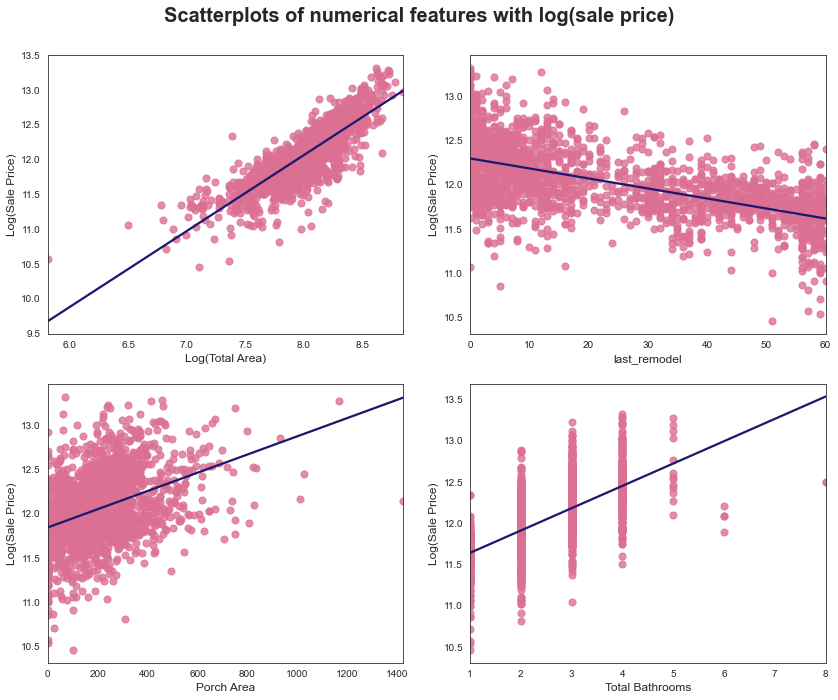

In [4446]:
list_of_columns = [("log_total_area", "log_saleprice"), 
                   ("last_remodel", "log_saleprice"), 
                   ("porch_area", "log_saleprice"), 
                   ("total_baths", "log_saleprice")]

list_of_labels = [("Log(Total Area)", "Log(Sale Price)"), 
                  ("last_remodel", "Log(Sale Price)"),
                  ("Porch Area", "Log(Sale Price)"), 
                  ("Total Bathrooms", "Log(Sale Price)")]

subplot_regscatter(housing, 
                   list_of_columns, 
                   list_of_labels, 
                   "Scatterplots of numerical features with log(sale price)", 
                   list_of_subtitles=None)

Log(Total Area), Porch Area and Total Bathrooms are positively correlated with sale price. Last remodel feature is negatively correlated. 

## 7. Modeling
---

##  7.1. Baseline Score

For this project, the baseline model is a simple linear regression in which the model is fitted with 1 variable, that is, the log of Above ground living area (log_liv).

In [4447]:
train["log_liv"] = train["Gr Liv Area"].map(lambda x: np.log(x))
holdout["log_liv"] = holdout["Gr Liv Area"].map(lambda x: np.log(x))

# set the variables for the train set
X_train_base = train[["log_liv"]]
y_train_base = train["log_saleprice"]

# set the variables for the holdout set
X_holdout_base = holdout[["log_liv"]]
y_holdout_base = holdout["log_saleprice"]

In [4448]:
# instantiate
lr_base = LinearRegression()

# fit the model
lr_base.fit(X_train_base, y_train_base)

# score
lr_base.score(X_train_base, y_train_base)

0.5330956661080879

In [4449]:
# mean square error for the train set
mean_squared_error(y_train_base, lr_base.predict(X_train_base))

0.07475895012090705

In [4450]:
# mean square error for the holdout set
mean_squared_error(y_holdout_base, lr_base.predict(X_holdout_base))

0.062173934186584845

## 7.2. Pre-Processing

In [4451]:
# features selected
variables1 = ["log_total_area", "porch_area", "last_remodel", "Fireplaces",
              "ex_kit", "zone4", "zone4_rl", "zone1", "zone1_rl", 
              "rl_baths", "total_baths", "ex_exter", "ex_overall"]

variables1_dum = ["ex_kit", "zone4", "zone4_rl", "zone1", 
                  "zone1_rl", "rl_baths", "ex_exter", "ex_overall"]
         
variables1_num = ["log_total_area", "porch_area", "last_remodel", "Fireplaces", 
                  "total_baths"] 

In [4452]:
housing[variables1].corr()

,log_total_area,porch_area,last_remodel,Fireplaces,ex_kit,zone4,zone4_rl,zone1,zone1_rl,rl_baths,total_baths,ex_exter,ex_overall
log_total_area,1.000000,0.385377,-0.413940,0.446051,0.352203,0.446485,0.450265,-0.421216,-0.264610,0.481268,0.576940,0.295796,0.349384
porch_area,0.385377,1.000000,-0.183576,0.326867,0.183162,0.211516,0.215477,-0.107974,-0.053691,0.255151,0.302145,0.156798,0.193054
last_remodel,-0.413940,-0.183576,1.000000,-0.126028,-0.250823,-0.307572,-0.306435,0.380623,0.238283,-0.298976,-0.458762,-0.210277,-0.223237
Fireplaces,0.446051,0.326867,-0.126028,1.000000,0.209067,0.234141,0.234738,-0.237627,-0.105650,0.349506,0.330236,0.168299,0.186905
ex_kit,0.352203,0.183162,-0.250823,0.209067,1.000000,0.401749,0.404837,-0.108986,-0.060292,0.165439,0.232755,0.587942,0.650360
zone4,0.446485,0.211516,-0.307572,0.234141,0.401749,1.000000,0.993679,-0.227287,-0.136624,0.347789,0.309011,0.366819,0.434542
zone4_rl,0.450265,0.215477,-0.306435,0.234738,0.404837,0.993679,1.000000,-0.225850,-0.135761,0.355935,0.309438,0.369396,0.437538
zone1,-0.421216,-0.107974,0.380623,-0.237627,-0.108986,-0.227287,-0.225850,1.000000,0.601109,-0.500371,-0.370951,-0.103702,-0.113301
zone1_rl,-0.264610,-0.053691,0.238283,-0.105650,-0.060292,-0.136624,-0.135761,0.601109,1.000000,-0.011584,-0.186851,-0.061163,-0.070254
rl_baths,0.481268,0.255151,-0.298976,0.349506,0.165439,0.347789,0.355935,-0.500371,-0.011584,1.000000,0.673135,0.132850,0.174173


In [4453]:
# scaling
# model 1
# y 
y_train1 = train["log_saleprice"]
y_holdout1 = holdout["log_saleprice"]
y_full1 = housing["log_saleprice"]

#X
X_train1 = train[variables1]
X_holdout1 = holdout[variables1]
X_full1 = housing[variables1]

# scale the train set
ss = StandardScaler()
X_train_sc1 = ss.fit_transform(X_train1[variables1_num])
X_train_sc1 = pd.concat([pd.DataFrame(X_train_sc1), X_train1[variables1_dum]], axis=1)

# scale the holdout set
X_holdout_sc1 = ss.transform(X_holdout1[variables1_num])
X_holdout_sc1 = pd.concat([pd.DataFrame(X_holdout_sc1), X_holdout1[variables1_dum]], axis=1)

# scale the full training set
X_full_sc1 = ss.transform(X_full1[variables1_num])
X_full_sc1 = pd.concat([pd.DataFrame(X_full_sc1), X_full1[variables1_dum]], axis=1)

## 7.3. Regression Models

## Linear Regression

In [4454]:
# instantiate
lr1 = LinearRegression()

# fit the model
lr1.fit(X_train_sc1, y_train1)

# model score
lr1.score(X_train_sc1, y_train1)

0.870077190275392

In [4455]:
# predict
yhat_lr1 = lr1.predict(X_train_sc1)

# model 1 cv score
-cross_val_score(lr1, X_train_sc1, y_train1, cv=21, scoring="neg_mean_squared_error").mean()

0.0214552707544814

In [4456]:
# create a function to generate plots for residuals

def residual_plots(residuals, y, prediction):
    sns.set_style("white")
    fig, ax = plt.subplots(1, 2, figsize=(16, 7)) 
    
    sns.histplot(residuals, color="cornflowerblue", ax=ax[0], kde=True, bins=100) 
    ax[0].axvline(np.mean(residuals), color="mediumvioletred",  linewidth=2, label="Mean") # mean line
    ax[0].legend()
    ax[0].set_title("Histogram of Residuals", fontsize=20)
    ax[0].set_xlabel("Residuals", fontsize=15)
    ax[0].set_ylabel("Count", fontsize=15)
    
    # Generate a scatterplot of predicted values versus actual values.
    ax[1].scatter(np.exp(prediction), np.exp(y), s=10, color="cornflowerblue", alpha = 0.7)
    ax[1].plot([0, np.max(np.exp(y))],
               [0, np.max(np.exp(y))],
               color = "red")
    ax[1].set_xlabel("Predicted Values: $\hat{y}$", fontsize = 15)
    ax[1].set_ylabel("Actual Values: $y$", fontsize = 15)
    ax[1].set_title("Predicted Values vs. Actual Values", fontsize = 20);
 
    fig.tight_layout(pad=2)
    
    return plt.show()

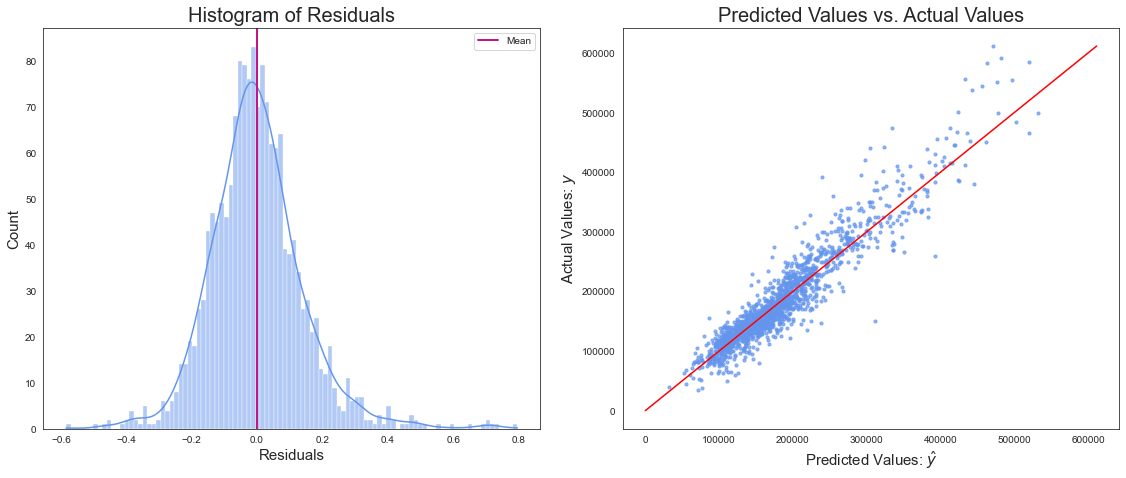

In [4457]:
# calculate residuals for model 1
res_lr1 = yhat_lr1 - y_train1

# plot residual for model 1
residual_plots(res_lr1, y_train1, yhat_lr1)

Based on the histogram, the residuals distribution resembles a normal distribution with a mean and its peak at 0. 

Based on the scatterplot of actual vs the predicted value of sale price, the points seem more widely scattered as sale price increases. The accuracy of the model seems to be inconsistent as its accuracy decrease when it predicts high values. This implies that there may be an issue of heteroscedasticity with the model. 

In [4458]:
# residual summary
res_lr1.describe()

count    1.620000e+03
mean     4.923359e-16
std      1.442761e-01
min     -5.843868e-01
25%     -8.463188e-02
50%     -8.949108e-03
75%      7.002428e-02
max      7.961327e-01
Name: log_saleprice, dtype: float64

In [4459]:
# mean square error for the holdout set
mean_squared_error(y_holdout1, lr1.predict(X_holdout_sc1))

0.017800981890021918

In [4460]:
# mean square error for the full train set
mean_squared_error(y_full1, lr1.predict(X_full_sc1))

0.020202394184664442

### OLS Model Summary

|Data Set|MSE|
|---|---|
|**Train**|0.0214552707544814|
|**Holdout**|0.017800981890021918|
|**Full Training**|0.020202394184664442|

In [4461]:
# lr coefficients
lr_coef = pd.DataFrame(lr1.coef_, index=X_train1.columns,
                       columns=['Coefficients'])
lr_coef

,Coefficients
log_total_area,0.190885
porch_area,0.024749
last_remodel,-0.083194
Fireplaces,0.048949
ex_kit,0.046915
zone4,0.098660
zone4_rl,0.232581
zone1,-0.112406
zone1_rl,-0.145051
rl_baths,0.059170


## Ridge Model

In [4462]:
# model 1
ridge1 = RidgeCV(alphas=np.logspace(0.1, 100, 100))
ridge1.fit(X_train_sc1, y_train1)

# predict
yhat_ridge1 = ridge1.predict(X_train_sc1)

# cv score for ridge train
-cross_val_score(Ridge(alpha=ridge1.alpha_), X_train_sc1, y_train1, cv=21, scoring="neg_mean_squared_error").mean()

0.02127154247050897

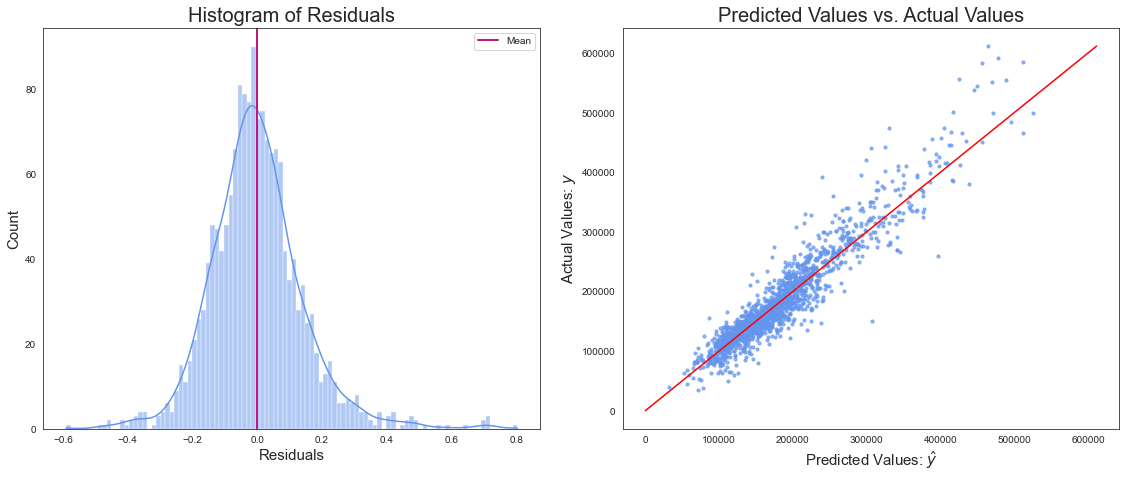

In [4463]:
# model 1
# calculate residuals
res_ridge1 = yhat_ridge1 - y_train1 

# plot
residual_plots(res_ridge1, y_train1, yhat_ridge1)

Similarly to OLS, the residuals distribution for the ridge model resembles a normal distribution with a mean and its peak at 0. 

Based on the scatterplot of actual vs the predicted value of sale price, the points seem to be also more widely scattered as sale price increases. This implies that there may be an issue of heteroscedasticity with the model. 

In [4464]:
# residual summary
res_ridge1.describe()

count    1.620000e+03
mean     6.063737e-16
std      1.445357e-01
min     -5.904734e-01
25%     -8.356754e-02
50%     -9.244137e-03
75%      7.189102e-02
max      8.037069e-01
Name: log_saleprice, dtype: float64

In [4465]:
# mean square error for the holdout set
mean_squared_error(y_holdout1, ridge1.predict(X_holdout_sc1))

0.018367334321626475

In [4466]:
# mean square error for the full train set
mean_squared_error(y_full1, ridge1.predict(X_full_sc1))

0.02037559877717381

### Ridge Model Summary

|Data Set|MSE|
|---|---|
|**Train**|0.02127154247050897|
|**Holdout**|0.018367334321626475|
|**Full Training**|0.02037559877717381|

In [4467]:
# ridge coefficients
ridge_coef = pd.DataFrame(ridge1.coef_, index=X_train1.columns,
                       columns=['Coefficients'])
ridge_coef

,Coefficients
log_total_area,0.190120
porch_area,0.024864
last_remodel,-0.084536
Fireplaces,0.049581
ex_kit,0.045720
zone4,0.094820
zone4_rl,0.073463
zone1,0.047513
zone1_rl,-0.127704
rl_baths,0.039890


## Lasso Model

In [4468]:
# model 1
lasso1 = LassoCV(n_alphas=200)
lasso1.fit(X_train_sc1, y_train1)

# predict
yhat_lasso1 = lasso1.predict(X_train_sc1)

# cv score for ridge
-cross_val_score(Lasso(alpha=lasso1.alpha_), X_train_sc1, y_train1, cv=22, scoring="neg_mean_squared_error").mean()

0.02133009186587104

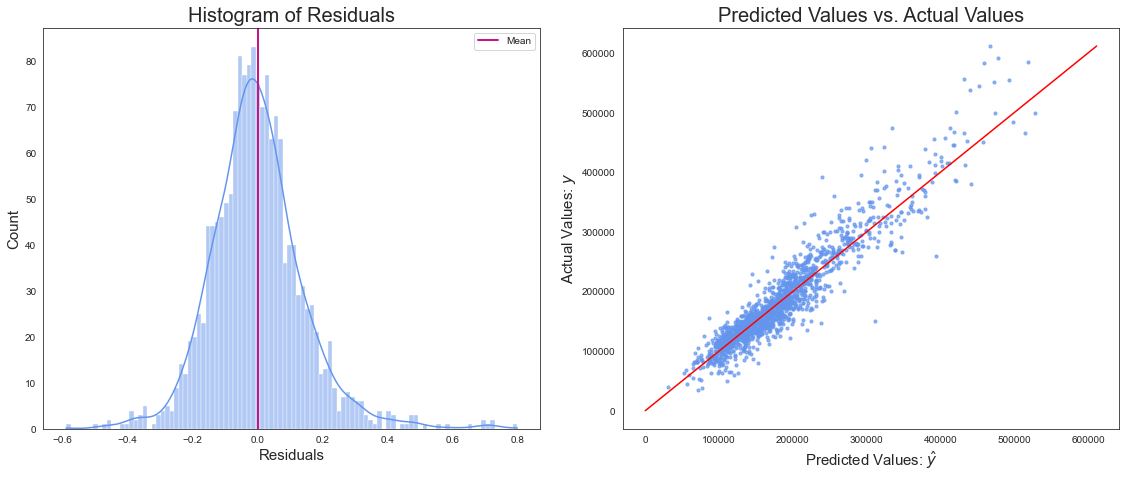

In [4469]:
# model 1
# calculate residuals
res_lasso1 = yhat_lasso1 - y_train1 

# plot
residual_plots(res_lasso1, y_train1, yhat_lasso1)

Similarly, the residuals distribution for the lasso model resembles a normal distribution with a mean and its peak at 0. 

Based on the scatterplot of actual vs the predicted value of sale price, the points seem to be also more widely scattered as sale price increases. This implies that there may be an issue of heteroscedasticity with the model. 

In [4470]:
# mean square error for the holdout set
mean_squared_error(y_holdout1, lasso1.predict(X_holdout_sc1))

0.018153529771425102

In [4471]:
# mean square error for the full train set
mean_squared_error(y_full1, lasso1.predict(X_full_sc1))

0.020295895828395128

### Lasso Model Summary

|Data Set|MSE|
|---|---|
|**Train**|0.02133009186587104|
|**Holdout**|0.018153529771425102|
|**Full Training**|0.020295895828395128|

In [4472]:
# lasso coefficients
lasso_coef = pd.DataFrame(lasso1.coef_, index=X_train1.columns,
                       columns=['Coefficients'])
lasso_coef

,Coefficients
log_total_area,0.191357
porch_area,0.024405
last_remodel,-0.083871
Fireplaces,0.048944
ex_kit,0.045358
zone4,0.097731
zone4_rl,0.119452
zone1,0.000000
zone1_rl,-0.135673
rl_baths,0.046798


## Elastic Model

In [4473]:
# model 1
elastic1 = ElasticNetCV(n_alphas = 200,  l1_ratio = np.linspace(0.1, 1, 10), cv=5)
elastic1.fit(X_train_sc1, y_train1)

# predict
yhat_elastic1 = elastic1.predict(X_train_sc1)

# cv score score for elastic
-cross_val_score(ElasticNet(alpha=elastic1.alpha_, 
                                  l1_ratio=elastic1.l1_ratio_), 
                                  X_train_sc1, 
                                  y_train1, cv=21, scoring="neg_mean_squared_error"
                                 ).mean()

0.021295598235671113

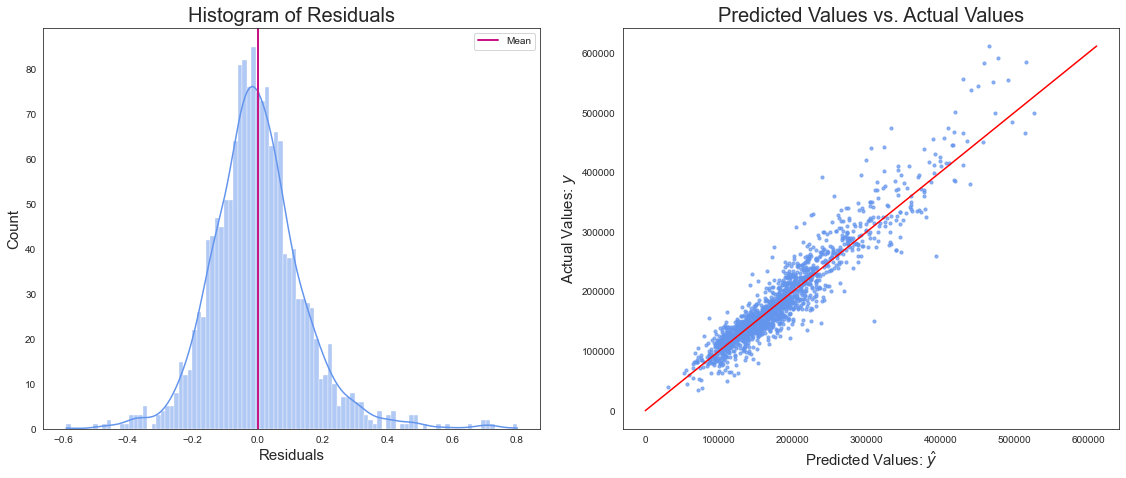

In [4474]:
# calculate residuals for model 2
res_elastic1 = yhat_elastic1 - y_train1

# residual plot for model 2
residual_plots(res_elastic1, y_train1, yhat_elastic1)

Similarly, the residuals distribution for the elastic model resembles a normal distribution with a mean and its peak at 0. 

Based on the scatterplot of actual vs the predicted value of sale price, the points seem to be also more widely scattered as sale price increases. This implies that there may be an issue of heteroscedasticity with the model. 

In [4475]:
# mean square error for the holdout set
mean_squared_error(y_holdout1, elastic1.predict(X_holdout_sc1))

0.01818217716538316

In [4476]:
# mean square error for the full train set
mean_squared_error(y_full1, elastic1.predict(X_full_sc1))

0.02030985297945861

### Elastic Model Summary

|Data Set|MSE|
|---|---|
|**Train**|0.021295598235671113|
|**Holdout**|0.01818217716538316|
|**Full Training**|0.02030985297945861|

In [4477]:
# elastic model coefficients
elastic_coef = pd.DataFrame(elastic1.coef_, index=X_train1.columns,
                       columns=['Coefficients'])
elastic_coef

/Users/nura/anaconda3/envs/dsi/lib/python3.8/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,Coefficients
log_total_area,0.191327
porch_area,0.024462
last_remodel,-0.084146
Fireplaces,0.049017
ex_kit,0.044993
zone4,0.097320
zone4_rl,0.116090
zone1,0.002387
zone1_rl,-0.132199
rl_baths,0.042950


## 8. Evaluation
---

## 8.1.  Results Summary


|Data Set|Baseline|OLS|Ridge|Lasso|Elastic|
|---|---|---|---|---|---|
|**Train**|0.07475895012090705|0.0214552707544814|0.02127154247050897|0.02133009186587104|0.021295598235671113|
|**Holdout**|0.062173934186584845|0.017800981890021918|0.018367334321626475|0.018153529771425102|0.01818217716538316|
|**Full Training**|--------------|0.020202394184664442|0.02037559877717381|0.020295895828395128|0.02030985297945861|


For the training set, the Ridge model has the lowest MSE out of all the other models. The OLS model has the lowest MSE for both the holdout and full train set. 

## 8.2. Production Model

In [4478]:
# model 1
X_fulltrain = housing[variables1]
y_fulltrain = housing["log_saleprice"]

# scale the full training set
ss = StandardScaler()
X_fulltrain_sc = ss.fit_transform(housing[variables1_num])
X_fulltrain_sc = pd.concat([pd.DataFrame(X_fulltrain_sc), housing[variables1_dum]], axis=1)

# model 1
ridgefull = RidgeCV(alphas=np.logspace(0.1, 100, 100))
ridgefull.fit(X_fulltrain_sc, y_fulltrain)

# cv score for ridge
-cross_val_score(Ridge(alpha=ridgefull.alpha_), X_fulltrain_sc, y_fulltrain, scoring="neg_mean_squared_error").mean()

0.0205691971227124

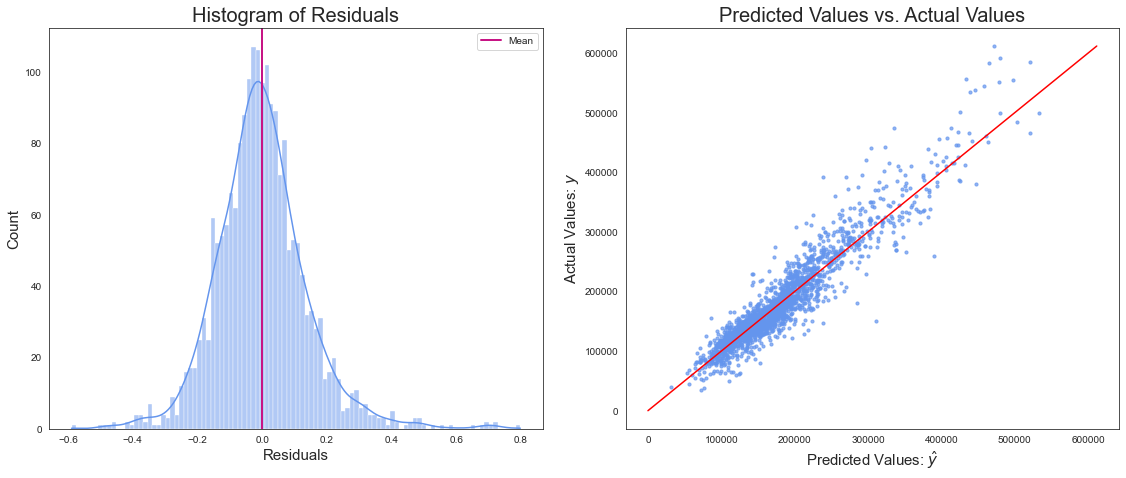

In [4479]:
# model 1

# predict
yhat_model = ridgefull.predict(X_fulltrain_sc)

# calculate residuals
res_model = yhat_model - y_fulltrain 

# plot
residual_plots(res_model, y_fulltrain, yhat_model)

The residuals distribution resembles a normal distribution with a mean and its peak at 0. 

Based on the scatterplot of actual vs the predicted value of sale price, the points seem more widely scattered as sale price increases. The accuracy of the model seems to be inconsistent as its accuracy decreases when it predicts high values. This implies that there may be an issue of heteroscedasticity with the model. 

In [4480]:
# model coefficients
model_coef = pd.DataFrame(ridgefull.coef_, index=X_fulltrain.columns,
                       columns=['Coefficients'])
model_coef

,Coefficients
log_total_area,0.187257
porch_area,0.024328
last_remodel,-0.083053
Fireplaces,0.046708
ex_kit,0.048759
zone4,0.103855
zone4_rl,0.241552
zone1,-0.124185
zone1_rl,-0.147732
rl_baths,0.056168


### zone4, zone4_rl

Based on the model, purchasing a property in a low residential density area in zone 4 would lead to a higher selling price than purchasing a property in other areas in zone 4. Holding other variables constant, a property in a low residential density area in zone 4 adds on average 41.3% to the selling price compared to only 10.9% added value with respect to a property in any non-low residential density areas in zone 4.

### zone1, zone1_rl

Based on the model, purchasing a property in a low residential density area in zone 1 would lead to an even lower selling price than purchasing a property in other areas in zone 1. Holding other variables constant, a property  in a low residential density area in zone 1 reduces the selling price by 23.8%. The drop is much larger than the drop in value of a property in a non-low density areas in the same zone (decrease by 11.7%)

### rl_baths, total_baths

Based on the model, the effect of having more bathrooms in a property located in a low residential density area is positive. Holding other variables constant, adding one bathroom to a property that is located in that area increases the selling price by 4.4% on average. This is in contrast to adding a bathroom in a property that is located in any non-low residential areas. Doing so would lead of 1.3% drop in selling price.

### ex_exter, ex_kit, ex_overall

Based on the model, maintaining the excellent quality of the exterior of the home, the kitchen and the overall property leads to a positive effect on the selling price. Holding other variables constant, having an excellent exterior of the home adds on average 5.9% of the selling price. On the other hand, having a kitchen that is of excellent quality adds on average 5.0% to the selling price. Addiitonally, having the highest overall quality of the property adds on average 13.3% to the value.

### fireplaces

An additional fireplace in the property adds on average 4.8% to the selling price, c.p. 

### last_remodel

With every additional year that the property goes without any remodelling, the sale price would drop by 8.0% on average, c.p.

### porch_area
With each additional square foot of porch area, the sale price would increase by 2.5% on average, c.p.

### log(total area)

Adding 10% to the total area of the property increases the saleprice by 1.9% on average, c.p.

## 9. Conclusions/ Recommendations
---

The selling price of a property is influenced by several factors. These factors include the property size, the location, the size of the porch, the number of bathrooms, the period since the property was last remodelled, and the quality of the property(including the kitchen and exterior). 

Based on the model, out of all these factors, the location seems to have the biggest impact on the sale price when it comes to properties in low residential density areas. The added value to a property in low residential density areas in zone 4 (most "prestigious" zone) is much higher than the added value to a property in other areas within the same zone. This is in contrast to zone 1(least "prestigious" zone). A property in a low residential density area in zone 1 has a more negative impact on the selling price than a property in other areas within the same zone. Hence, the client should consider purchasing the property in zone 4 and avoid zone 1. Neighbourhoods in zone 4 includes StoneBr and NRidgHt.

Additionally, purchasing a property in a low residential density area that has a fireplace and more bathrooms adds more value to the property.

Moreover, to increase the value, the home owner should maintain his property in the best possible state. He needs to ensure that the overall state of his property, including the kitchen and the exterior of the property to be in the best state and condition. This could be done by renovating the kitchen or repainting or remodelling the exterior and interior of his home. Should he wish to sell the property in the future, he would need to renovate his property just prior to selling it. This is to avoid inccuring a loss and to earn him the maximum amount of returns. 

## 10. Kaggle Submission
---

In [4481]:
# Import data
path = "../datasets/test.csv"
test = pd.read_csv(path)

In [4482]:
# clean and transform data
test = clean_data(test)
test = drop_outliers(test)
test = transform_numfeatures(test)
test = pd.merge(test, neighbourhood, how="left", on="Neighborhood")
test = transform_catfeatures(test)
test = interactive_feat(test)

In [4483]:
# scale test set
X_test_sc = ss.transform(test[variables1_num])
X_test_sc = pd.concat([pd.DataFrame(X_test_sc), test[variables1_dum]], axis=1)

ridgebest = Ridge(alpha=ridgefull.alpha_)
ridgebest.fit(X_fulltrain_sc, y_fulltrain)
log_ypred_r = ridgebest.predict(X_test_sc)

In [4484]:
test["log_saleprice"] = log_ypred_r
test["SalePrice"] = test["log_saleprice"].map(lambda x: np.exp(x))

In [4485]:
kaggle_sub1 = test[["Id", "SalePrice"]]
kaggle_sub1.to_csv("../datasets/kaggle_ridgelast2.csv", index=False)

### kaggle Score

|Private Score|Public Score|
|---|---|
|31018.40884|31498.34039|